In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import scipy
import scipy.stats


In [2]:
ds = pd.read_csv('data.csv')

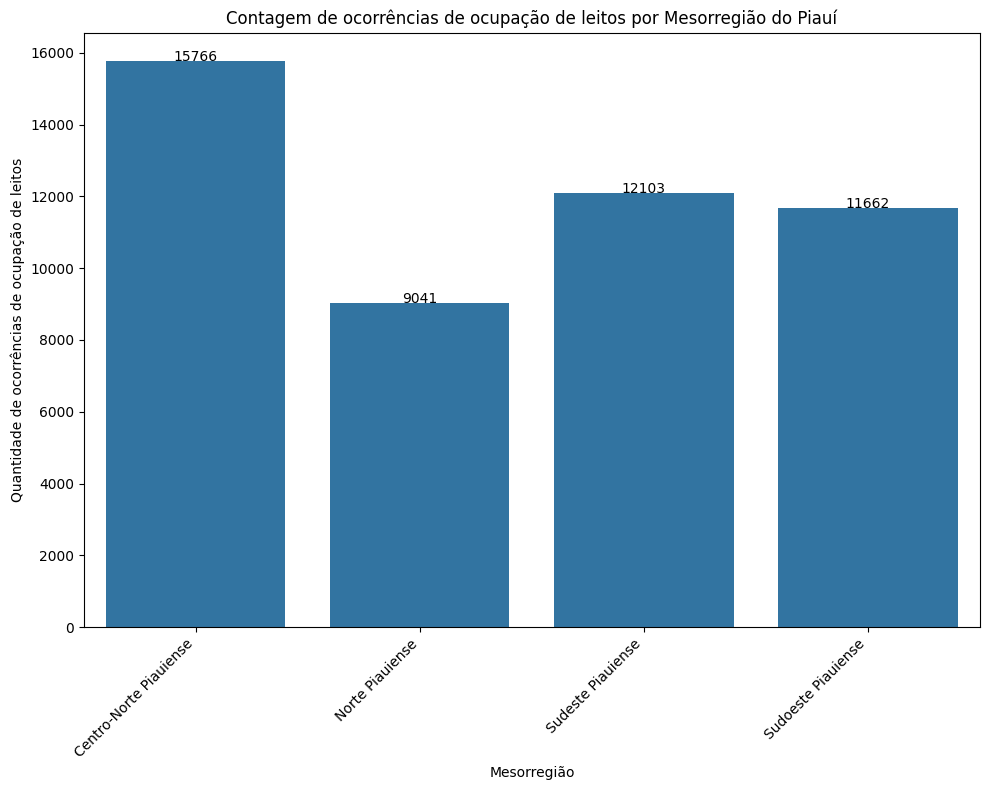

In [3]:
contagem_mesoregiao = ds.groupby('Mesoregião').size().reset_index(name='Quantidade')

plt.figure(figsize=(10, 8))
barplot = sns.barplot(x='Mesoregião', y='Quantidade', data=contagem_mesoregiao)
plt.title('Contagem de ocorrências de ocupação de leitos por Mesorregião do Piauí')
plt.xlabel('Mesorregião')
plt.ylabel('Quantidade de ocorrências de ocupação de leitos')
plt.xticks(rotation=45, ha='right')

for index, row in contagem_mesoregiao.iterrows():
    barplot.text(index, row['Quantidade'], row['Quantidade'], color='black', ha="center")

plt.tight_layout()
plt.show()

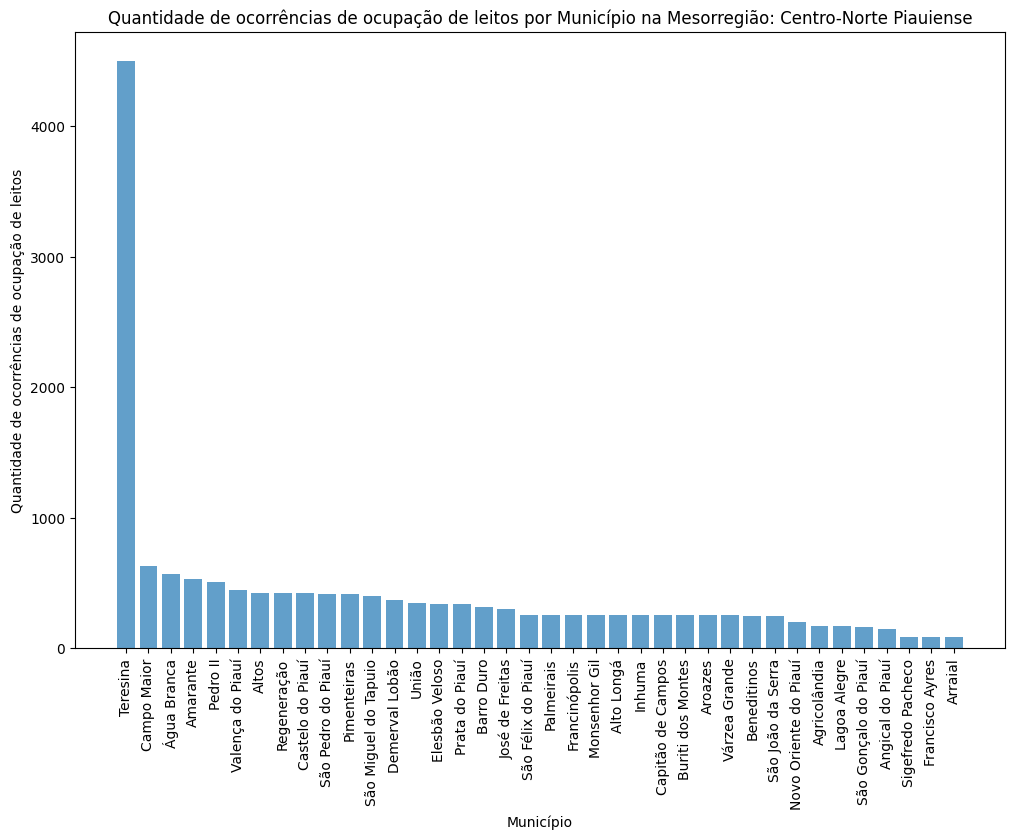

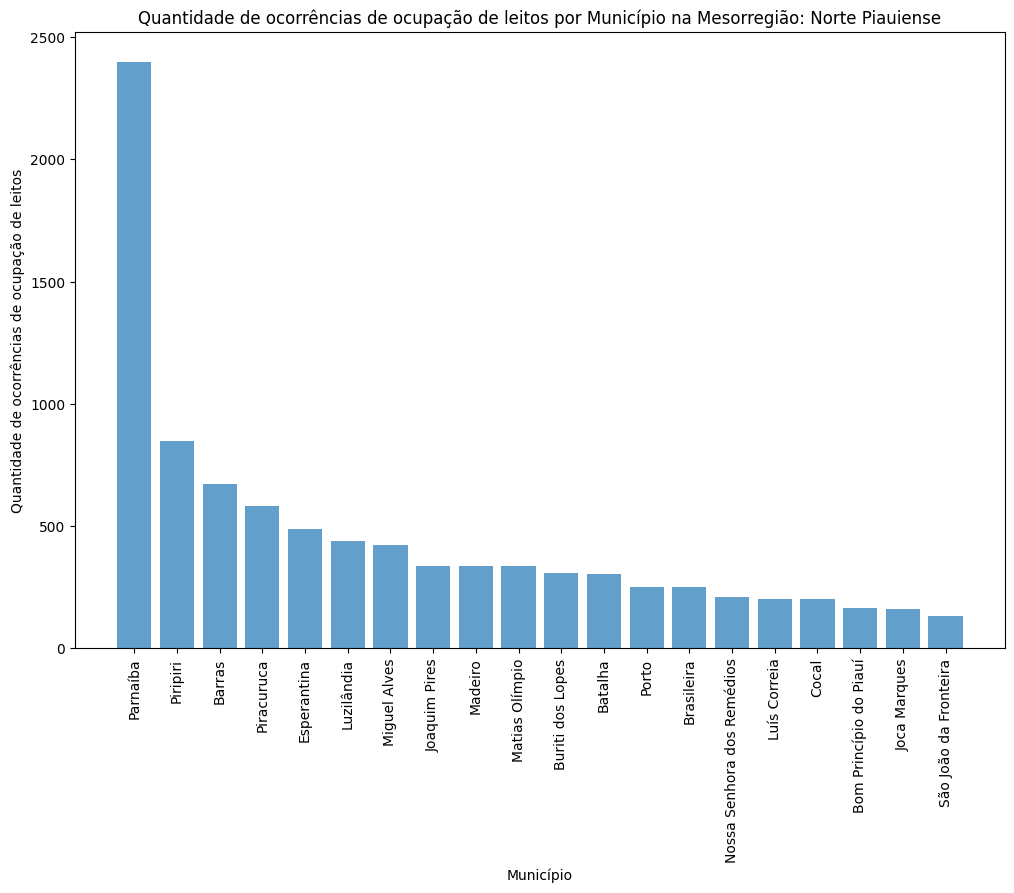

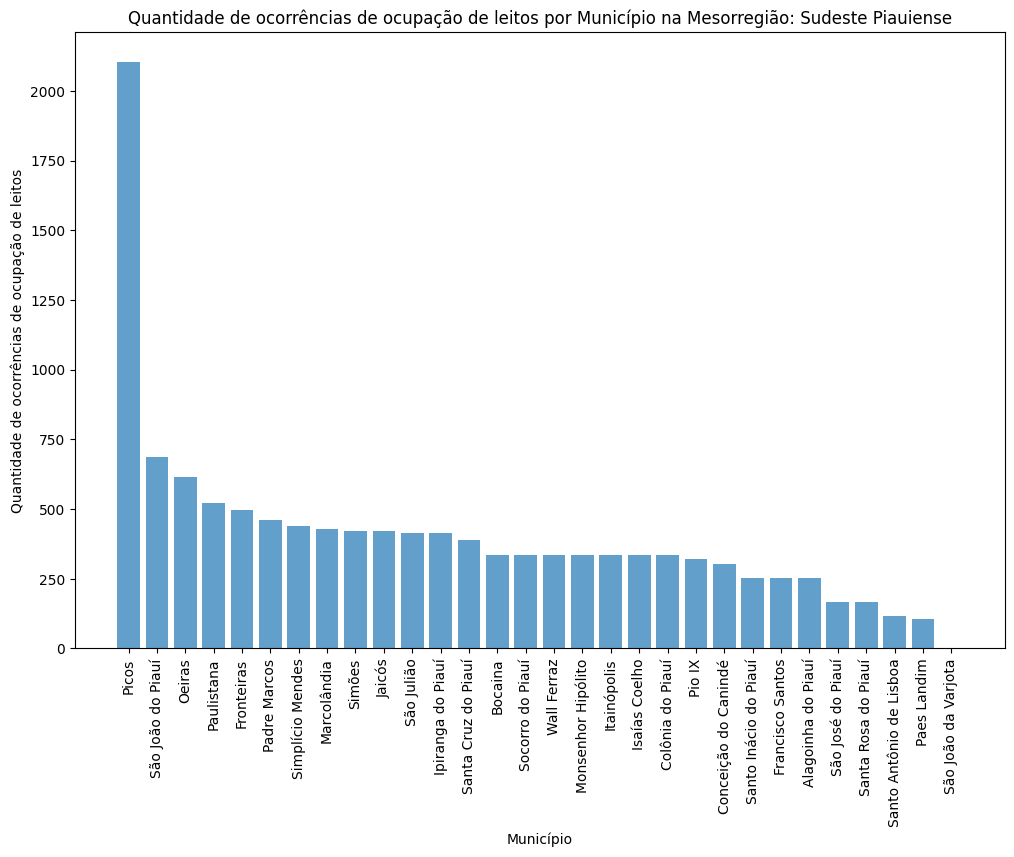

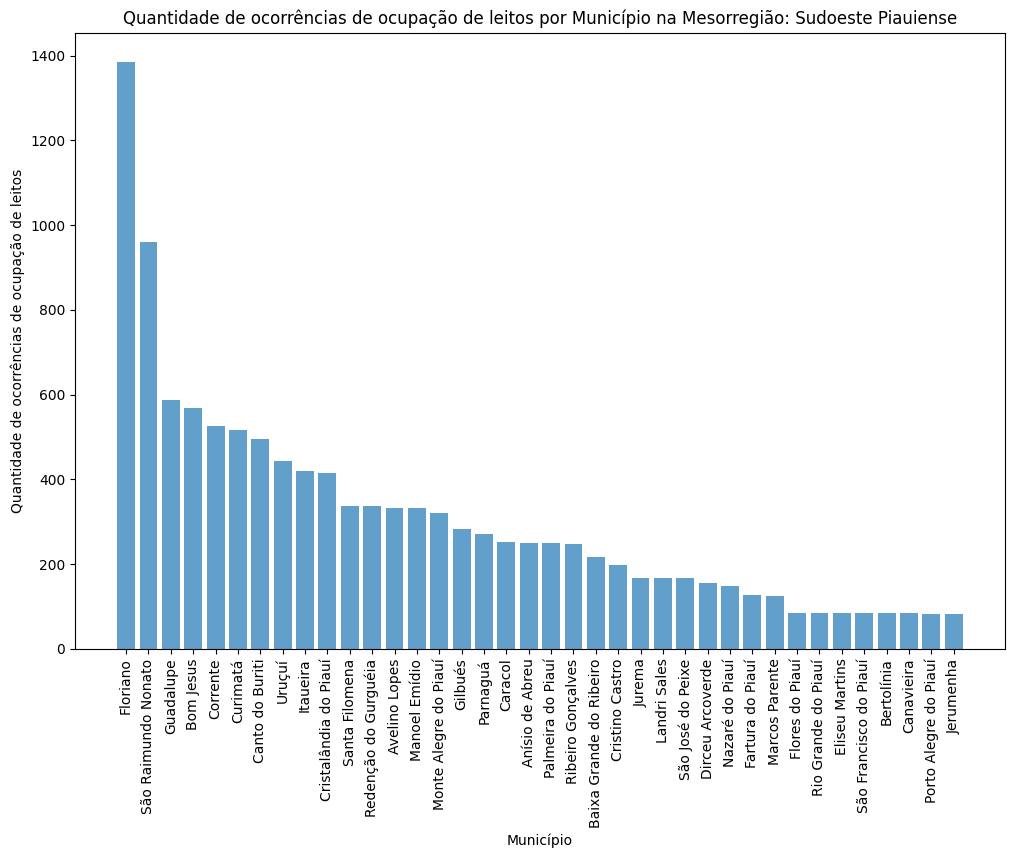

In [10]:
casos_por_municipio = ds.groupby(['Mesoregião', 'Município']).size().reset_index(name='Quantidade de Casos')

mesoregioes = casos_por_municipio['Mesoregião'].unique()

for mesoregiao in mesoregioes:
    dados_mesoregiao = casos_por_municipio[casos_por_municipio['Mesoregião'] == mesoregiao]

    dados_mesoregiao = dados_mesoregiao.sort_values('Quantidade de Casos', ascending=False)

    plt.figure(figsize=(12, 8))
    plt.bar(dados_mesoregiao['Município'], dados_mesoregiao['Quantidade de Casos'], alpha=0.7)
    plt.title(f'Quantidade de ocorrências de ocupação de leitos por Município na Mesorregião: {mesoregiao}')
    plt.xlabel('Município')
    plt.ylabel('Quantidade de ocorrências de ocupação de leitos')
    plt.xticks(rotation=90)
    plt.show()

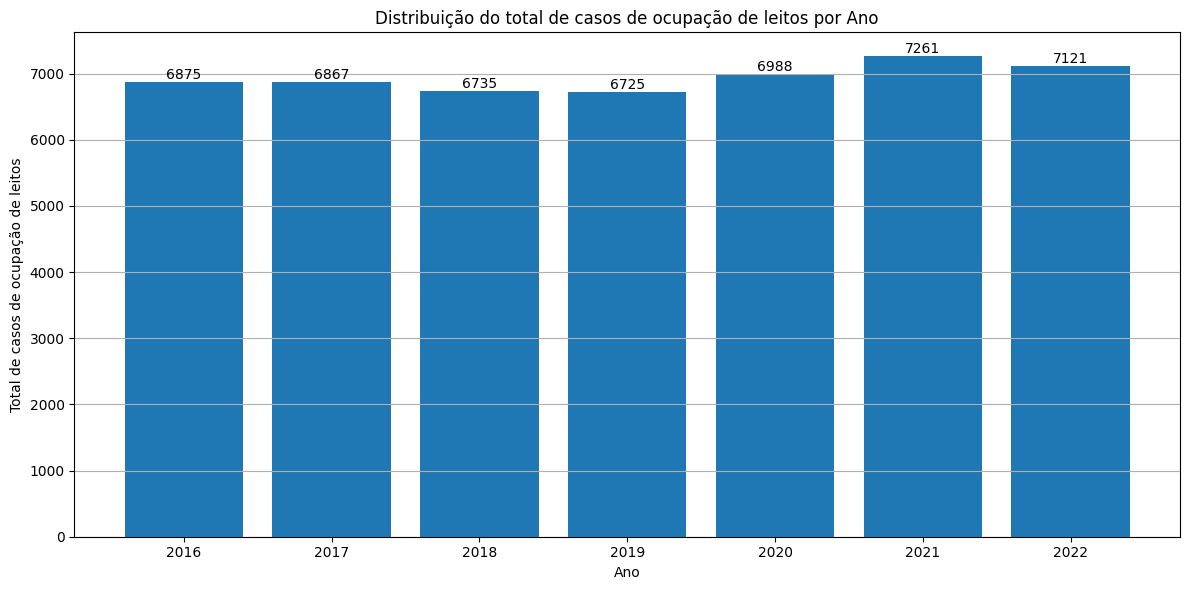

In [11]:
total_casos_por_ano = ds.groupby('Ano').size().reset_index(name='TotalCasos')

plt.figure(figsize=(12, 6))
bars = plt.bar(total_casos_por_ano['Ano'], total_casos_por_ano['TotalCasos'])

plt.title('Distribuição do total de casos de ocupação de leitos por Ano')
plt.xlabel('Ano')
plt.ylabel('Total de casos de ocupação de leitos')
plt.grid(axis='y')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(bar.get_height())), ha='center', va='bottom')

plt.tight_layout()
plt.show()

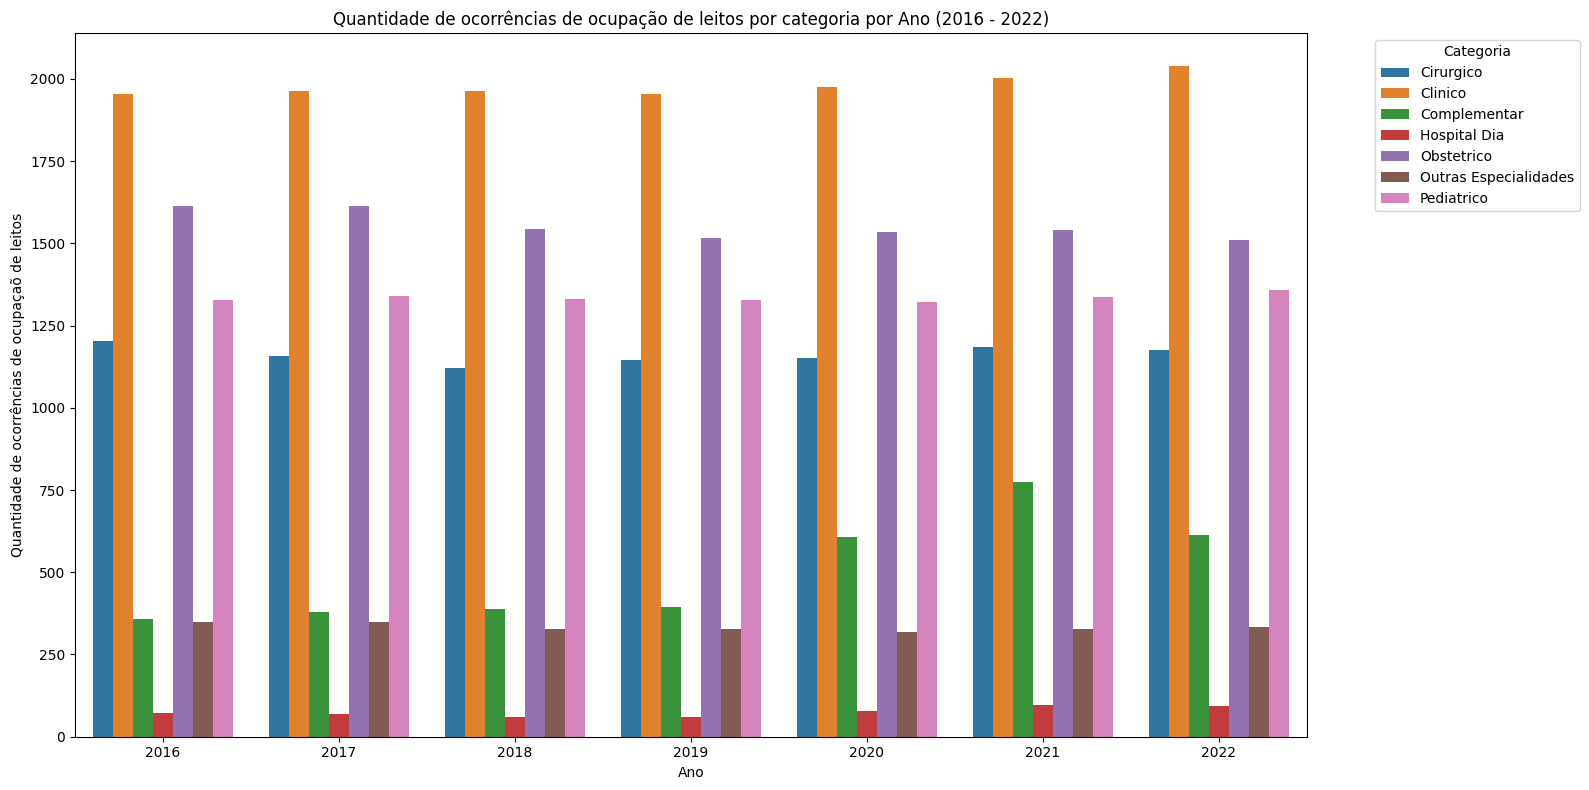

In [12]:
grouped_data_count = ds.groupby(['Categoria', 'Ano']).size().reset_index(name='Contagem')

plt.figure(figsize=(16, 8))
sns.barplot(x='Ano', y='Contagem', hue='Categoria', data=grouped_data_count)
plt.title('Quantidade de ocorrências de ocupação de leitos por categoria por Ano (2016 - 2022)')
plt.xlabel('Ano')
plt.ylabel('Quantidade de ocorrências de ocupaçaõ de leitos')
plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

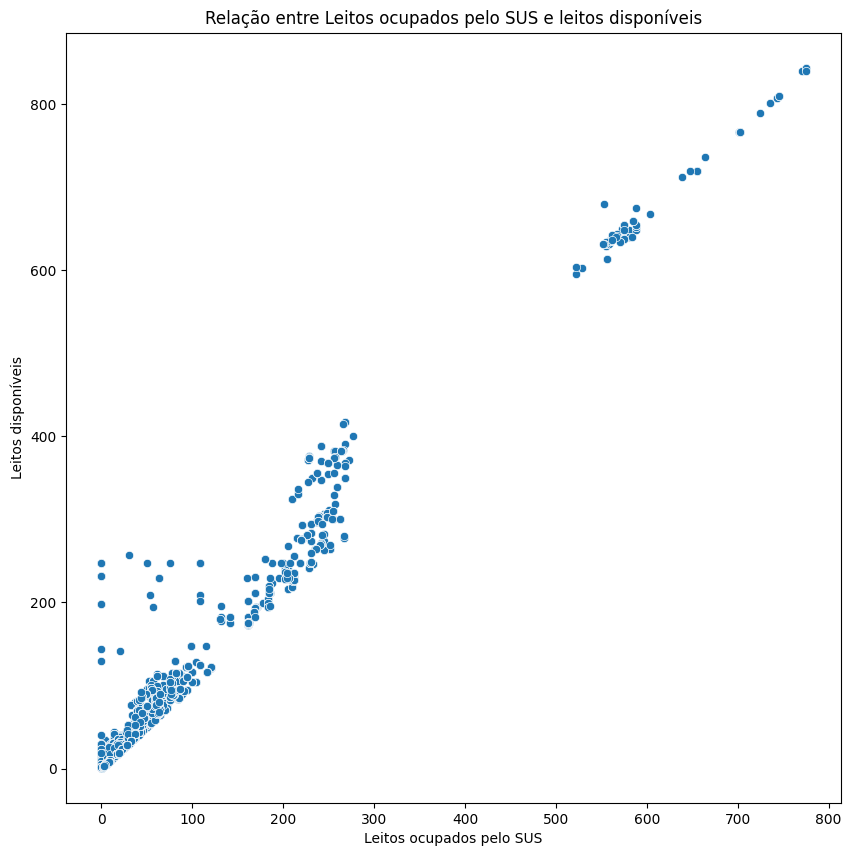

In [13]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='SUS', y='Existente', data=ds)
plt.title('Relação entre Leitos ocupados pelo SUS e leitos disponíveis')
plt.xlabel('Leitos ocupados pelo SUS')
plt.ylabel('Leitos disponíveis')
plt.show()

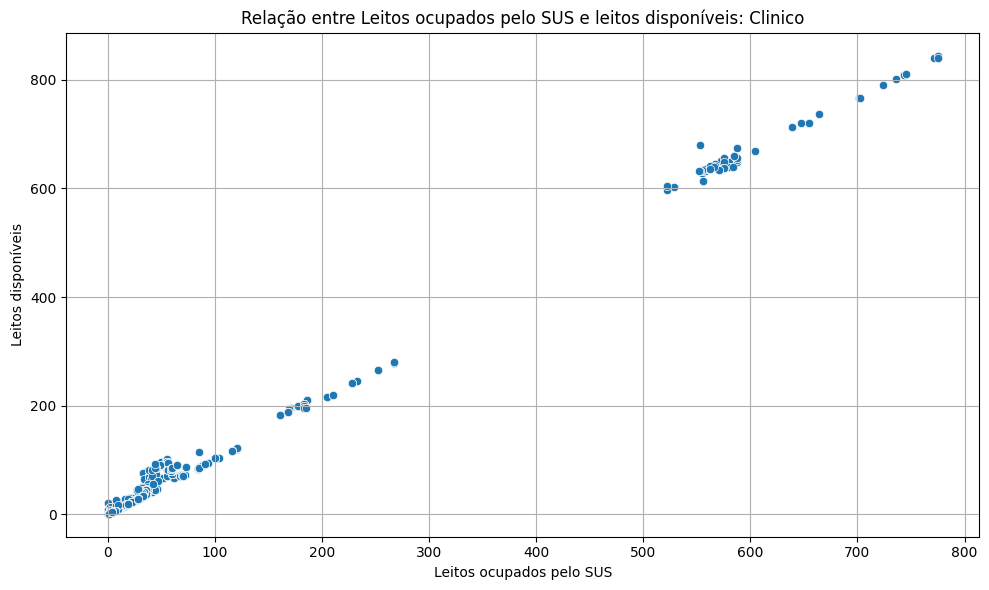

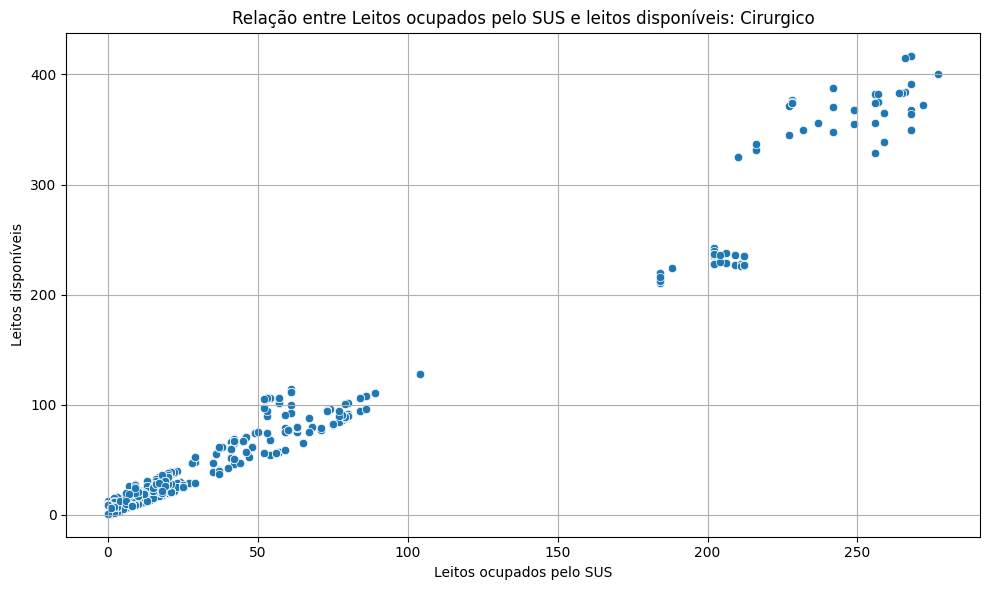

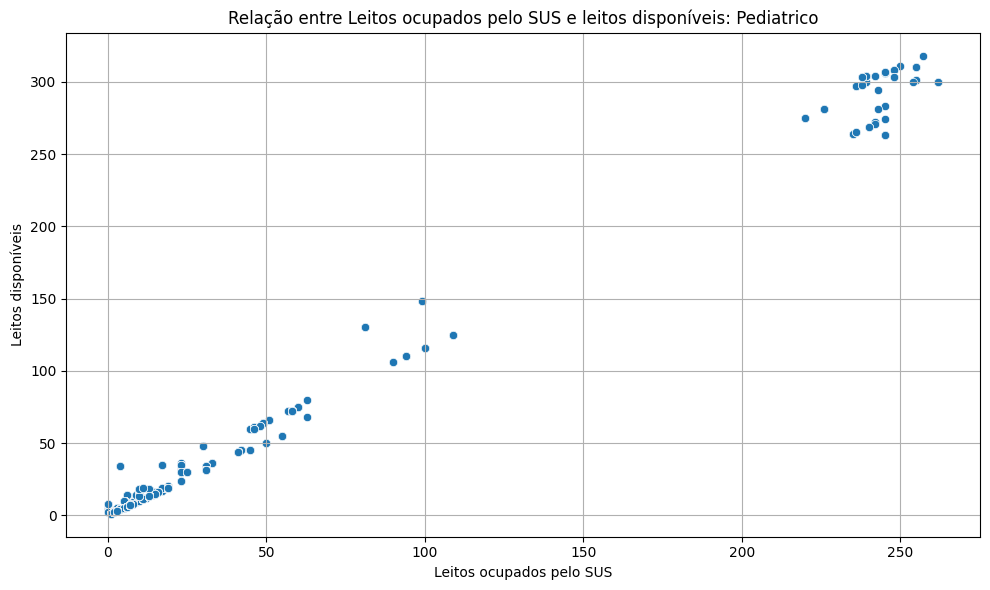

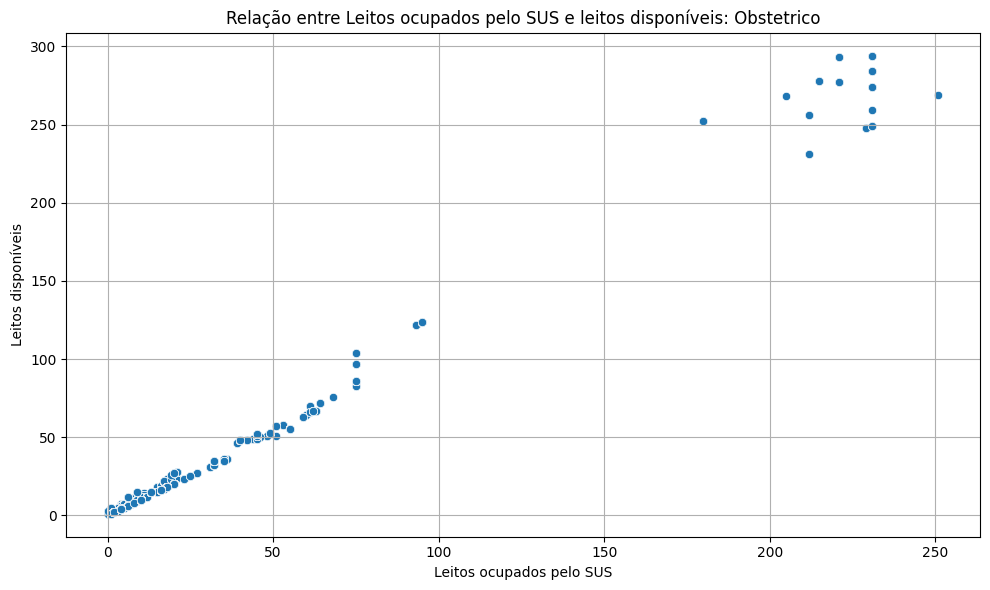

In [14]:
# Lista das categorias desejadas
categorias_desejadas = ['Clinico', 'Cirurgico', 'Pediatrico', 'Obstetrico']

# Criando scatter plots separados para cada categoria desejada
for categoria in categorias_desejadas:
    # Filtrando os dados para a categoria atual
    dados_categoria = ds[ds['Categoria'] == categoria]

    # Criando o scatter plot para a taxa de ocupação por categoria atual
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='SUS', y='Existente', data=dados_categoria)
    plt.title(f'Relação entre Leitos ocupados pelo SUS e leitos disponíveis: {categoria}')
    plt.xlabel('Leitos ocupados pelo SUS')
    plt.ylabel('Leitos disponíveis')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # https://www.flai.com.br/juscudilio/scatter-plot-um-guia-completo-para-graficos-de-dispersao/

In [15]:
contagem_por_mes_ano = ds.groupby(['Ano', 'Mes']).size().reset_index(name='Quantidade')

heatmap_data = contagem_por_mes_ano.pivot(index='Ano', columns='Mes', values='Quantidade')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Heatmap de ocorrências de ocupação de leitos por mês e ano')
plt.xlabel('Mês')
plt.ylabel('Ano')2
plt.show()

SyntaxError: invalid syntax (3749882707.py, line 9)

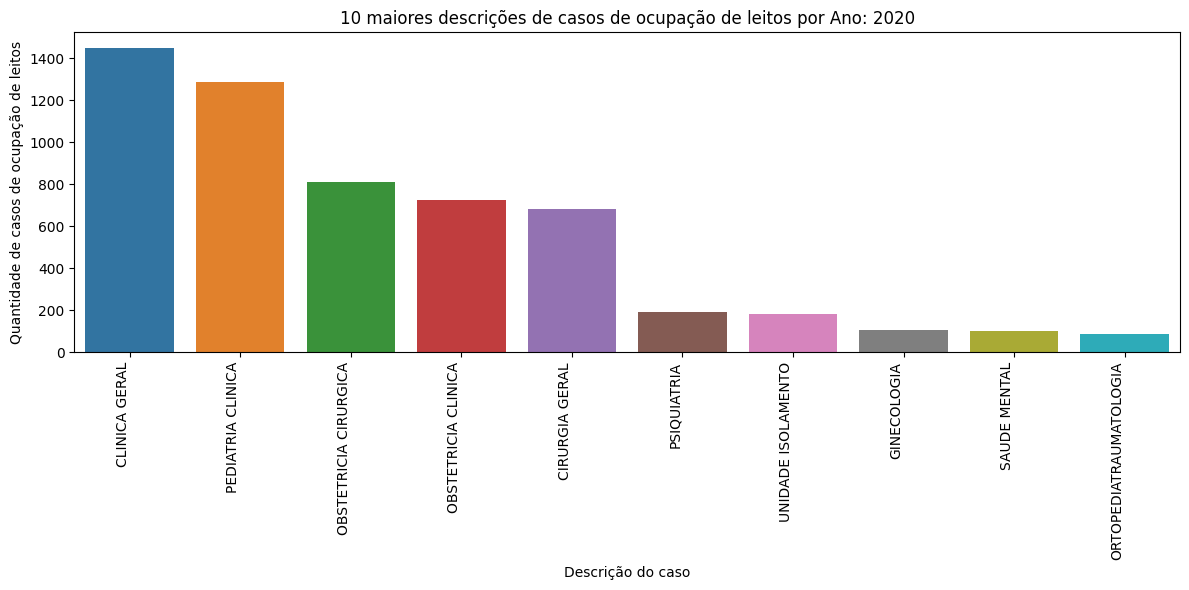

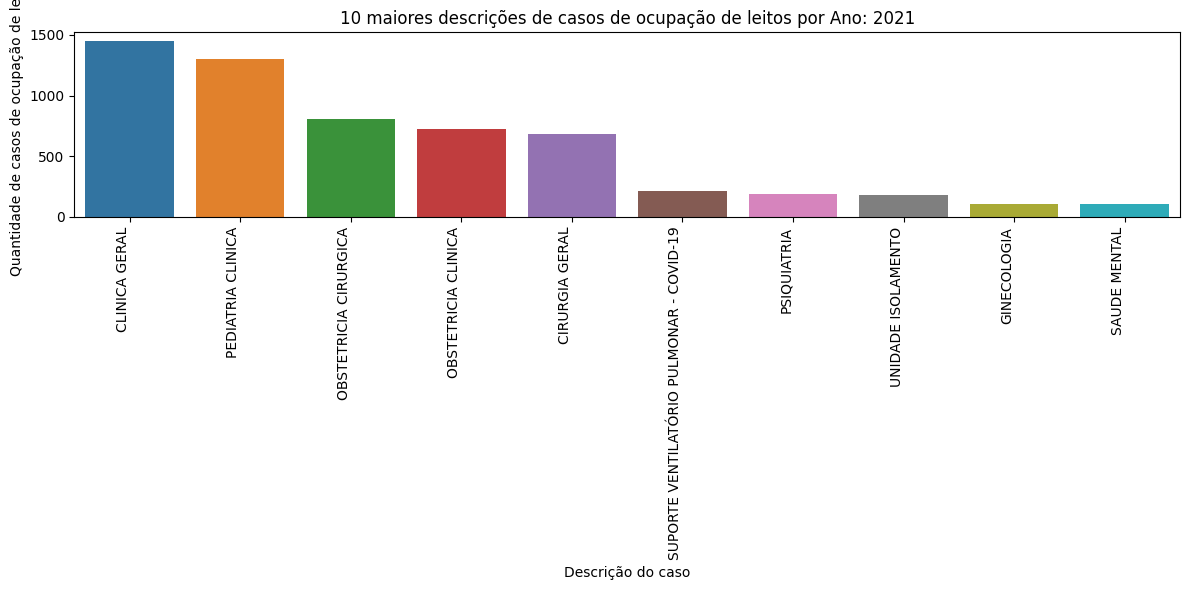

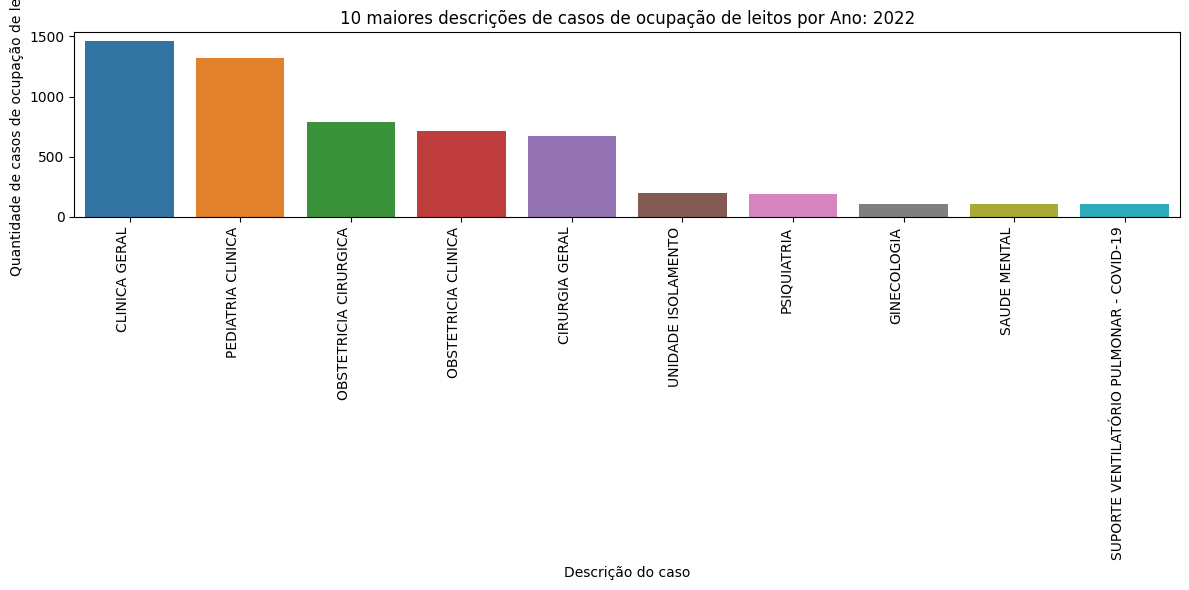

In [ ]:
def plot_top5_bars(data, year):
    casos_por_descricao = data.groupby('Descrição').size().reset_index(name='Quantidade')

    top5_descricoes = casos_por_descricao.sort_values(by='Quantidade', ascending=False).head(10)

    plt.figure(figsize=(12, 6))
    sns.barplot(x='Descrição', y='Quantidade', data=top5_descricoes)
    plt.title(f'10 maiores descrições de casos de ocupação de leitos por Ano: {year}')
    plt.xlabel('Descrição do caso')
    plt.ylabel('Quantidade de casos de ocupação de leitos')
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.show()
dados_2020 = ds[ds['Ano'] == 2020]
dados_2021 = ds[ds['Ano'] == 2021]
dados_2022 = ds[ds['Ano'] == 2022]

plot_top5_bars(dados_2020, 2020)
plot_top5_bars(dados_2021, 2021)
plot_top5_bars(dados_2022, 2022)

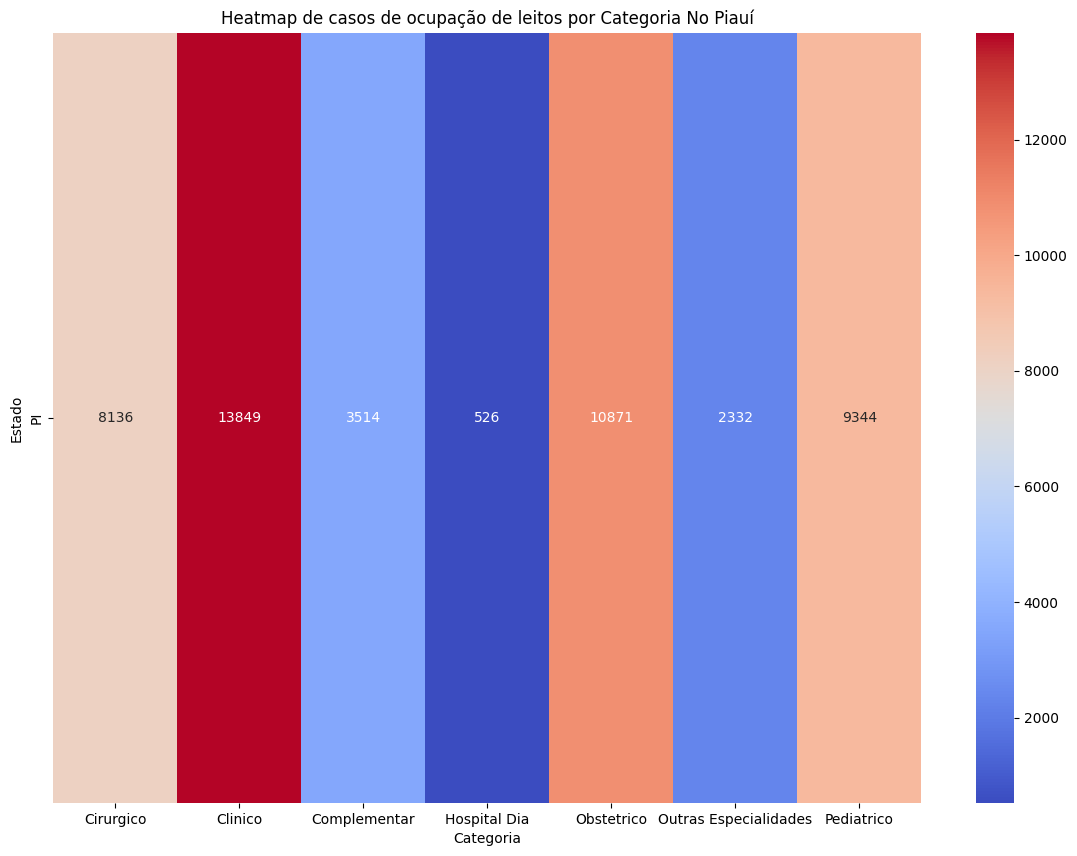

In [ ]:
casos_estado_categoria = ds.groupby(['Estado', 'Categoria']).size().unstack()

plt.figure(figsize=(14, 10))
sns.heatmap(casos_estado_categoria, annot=True, cmap='coolwarm', fmt='g')
plt.title('Heatmap de casos de ocupação de leitos por Categoria No Piauí')
plt.xlabel('Categoria')
plt.ylabel('Estado')
plt.show()

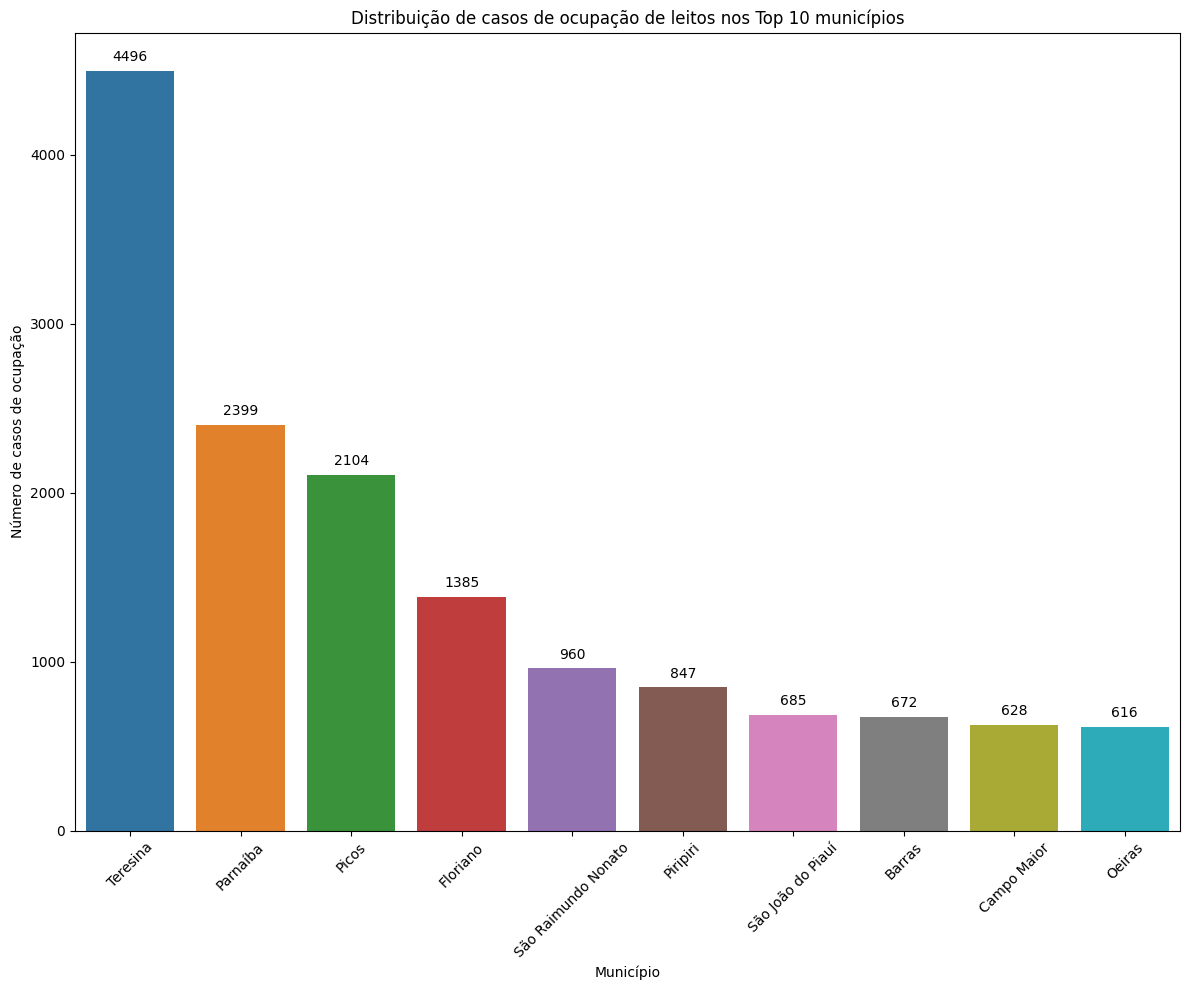

In [ ]:
top_n = 10
top_municipios = ds['Município'].value_counts().head(top_n).index
ds_top_municipios = ds[ds['Município'].isin(top_municipios)]

plt.figure(figsize=(12, 10))
ax = sns.countplot(x='Município', data=ds_top_municipios, order=top_municipios)
plt.title(f'Distribuição de casos de ocupação de leitos nos Top {top_n} municípios')
plt.xlabel('Município')
plt.ylabel('Número de casos de ocupação')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.tight_layout()
plt.show()

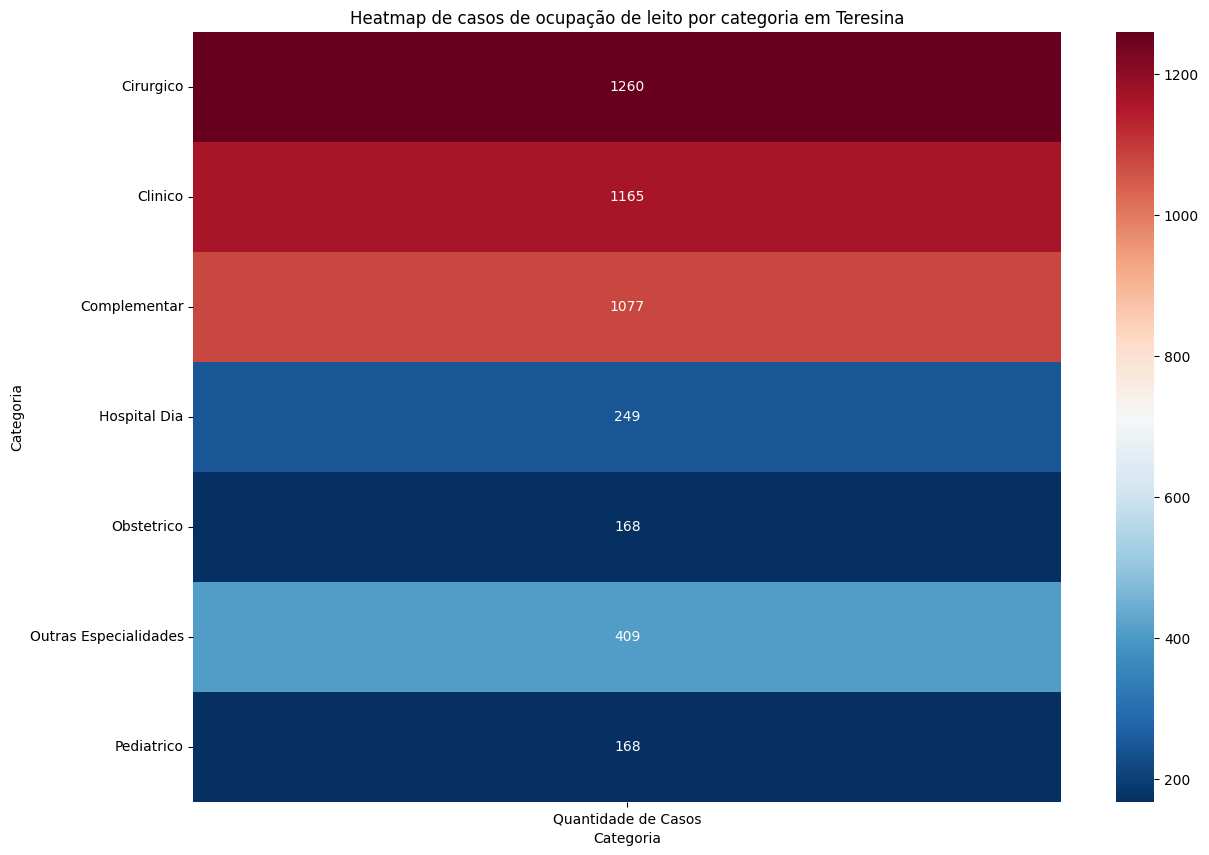

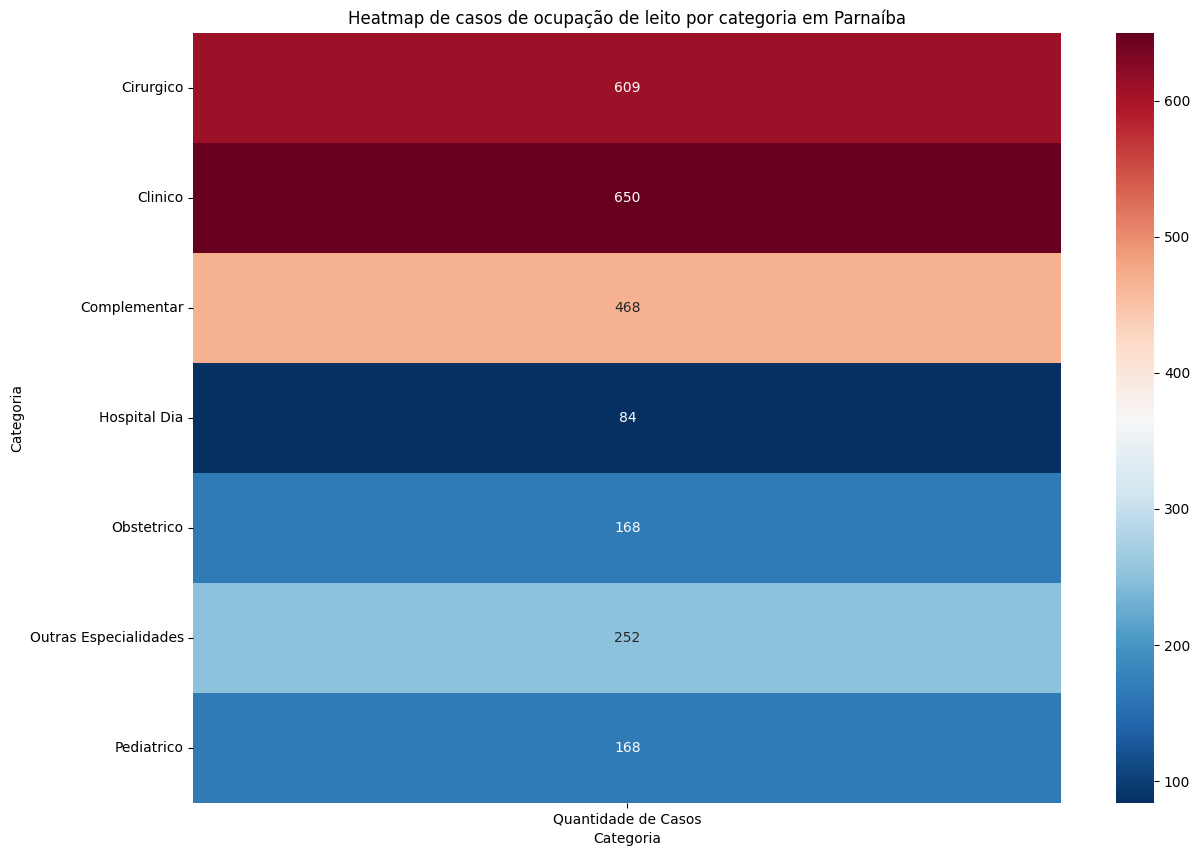

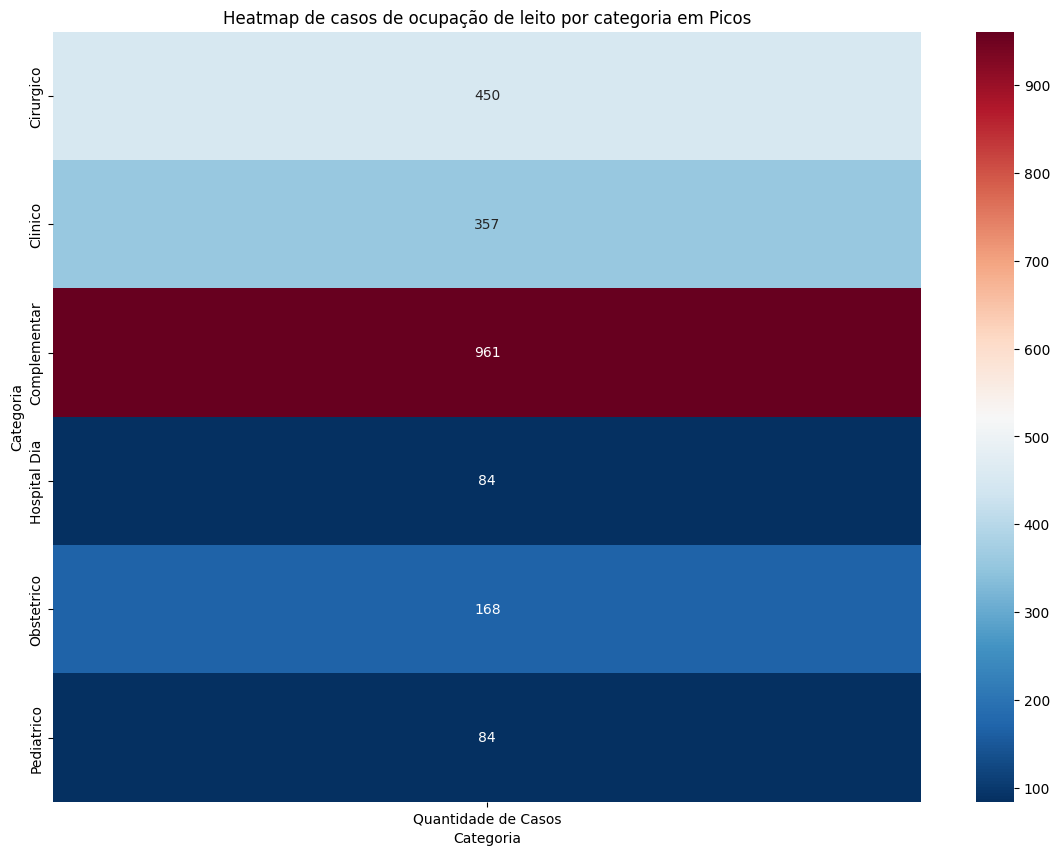

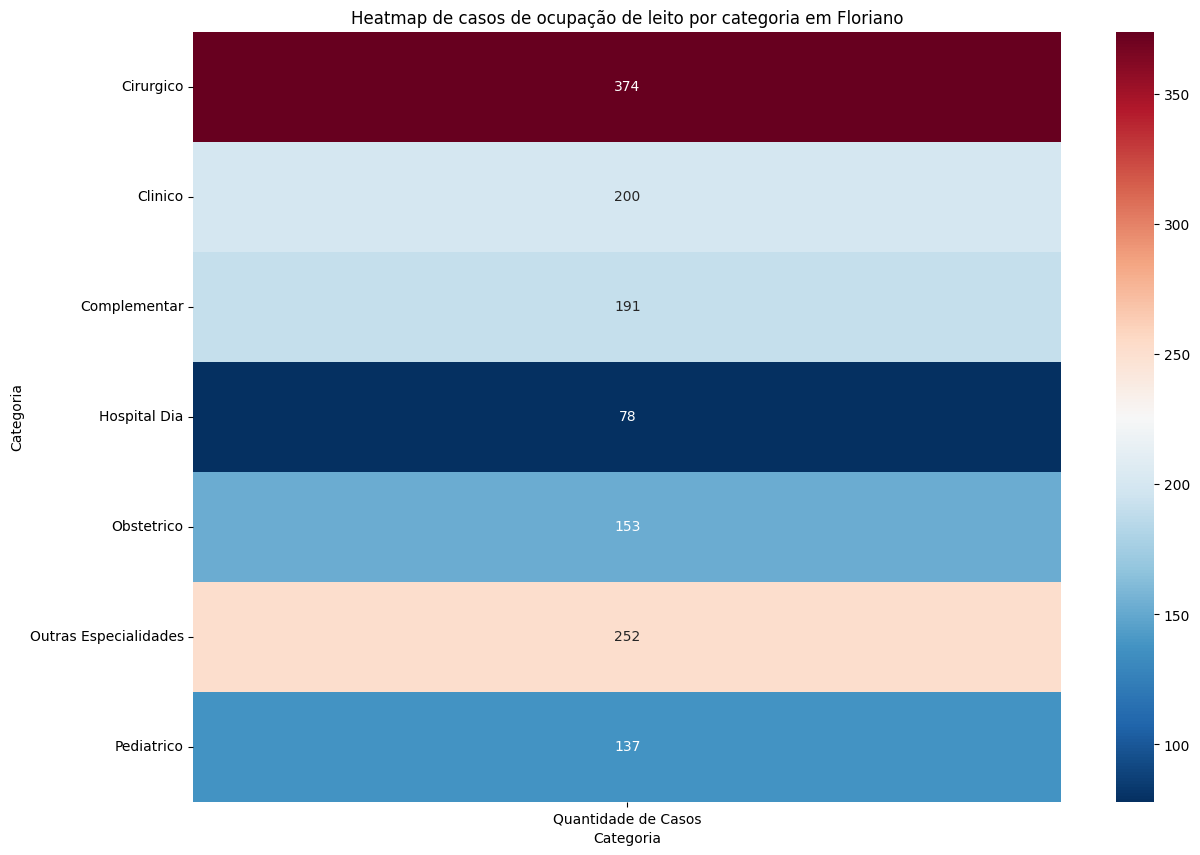

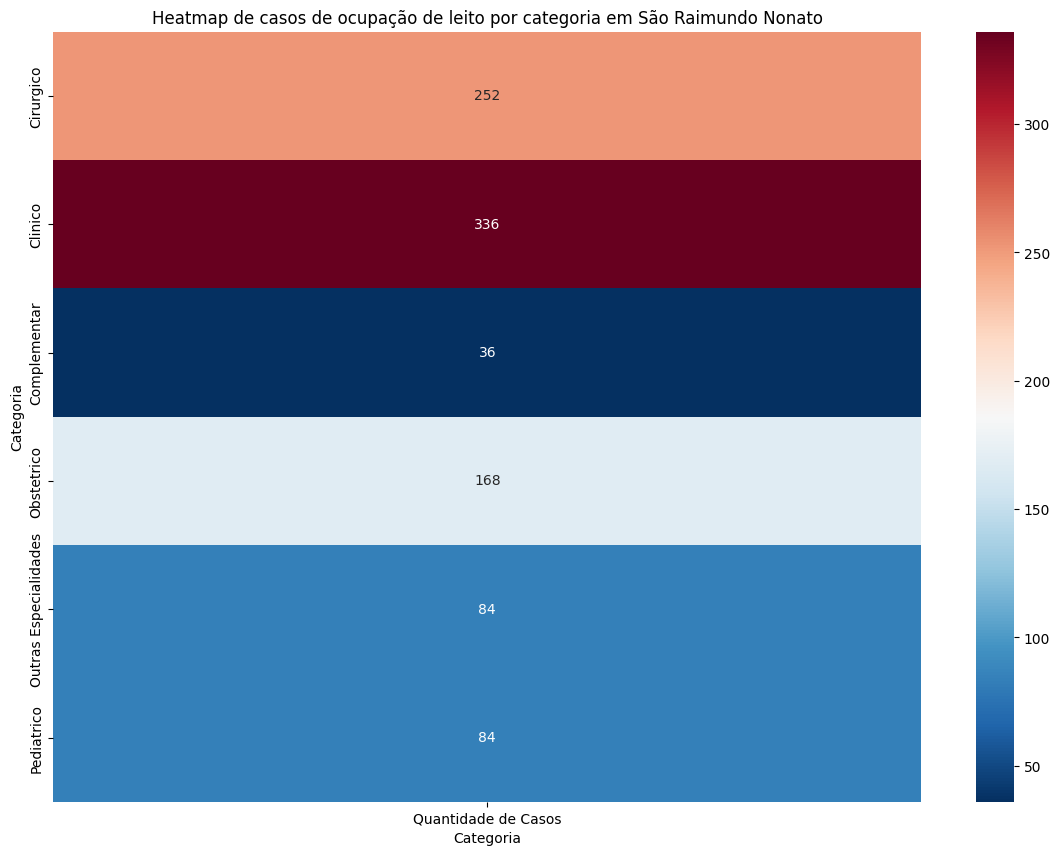

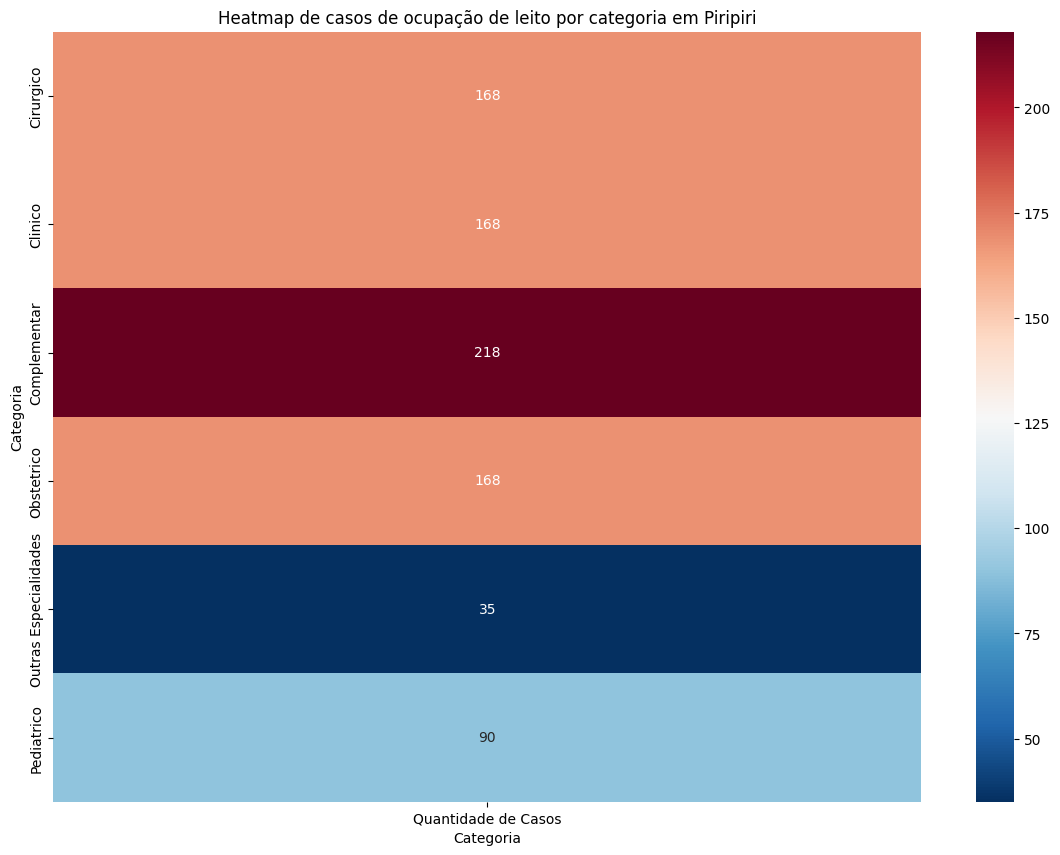

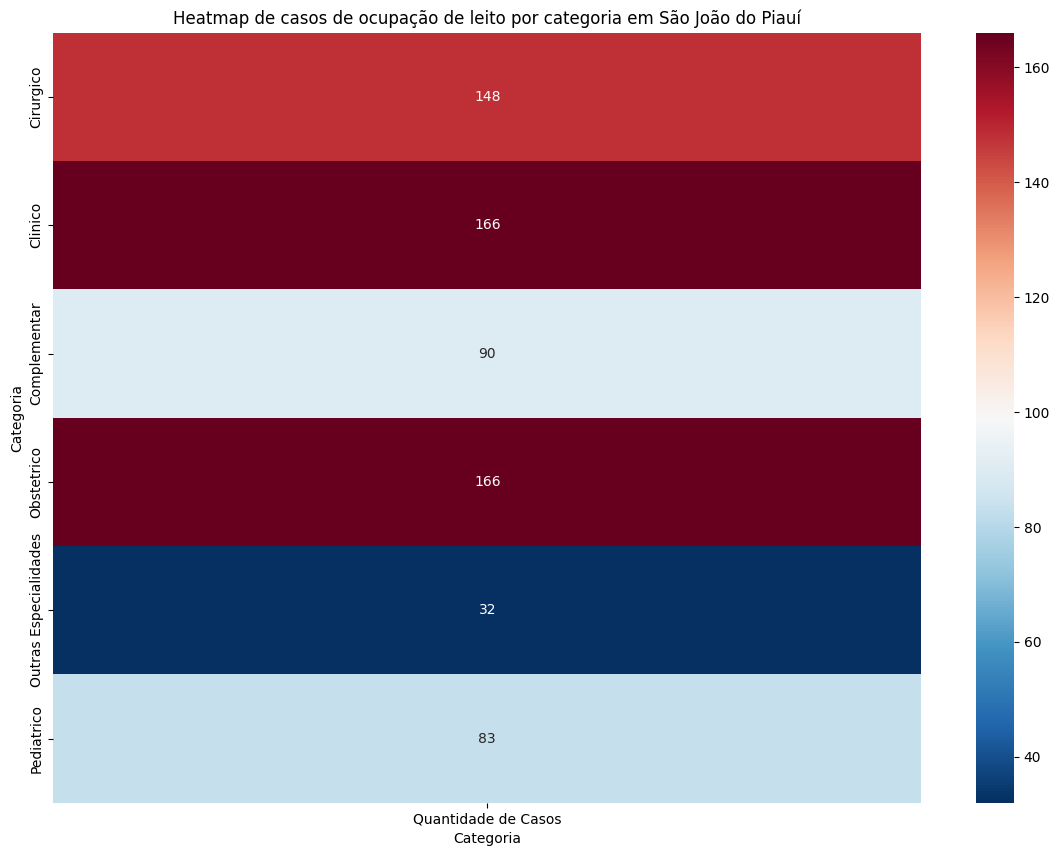

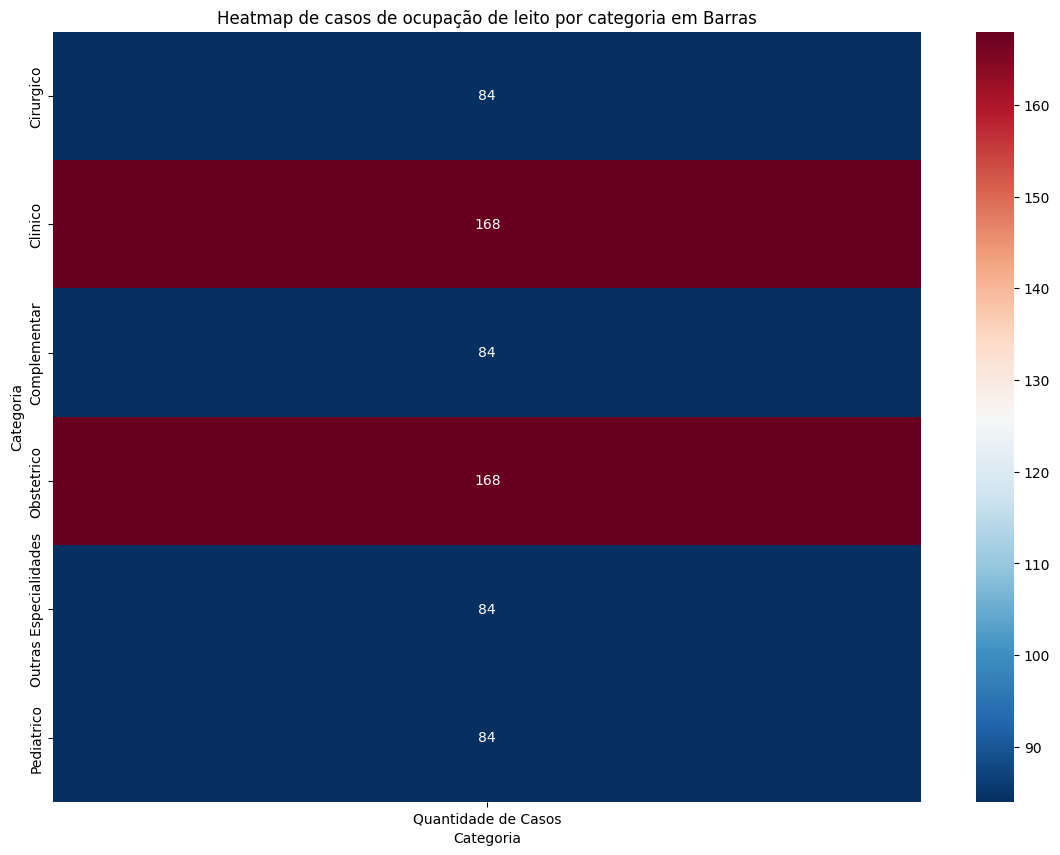

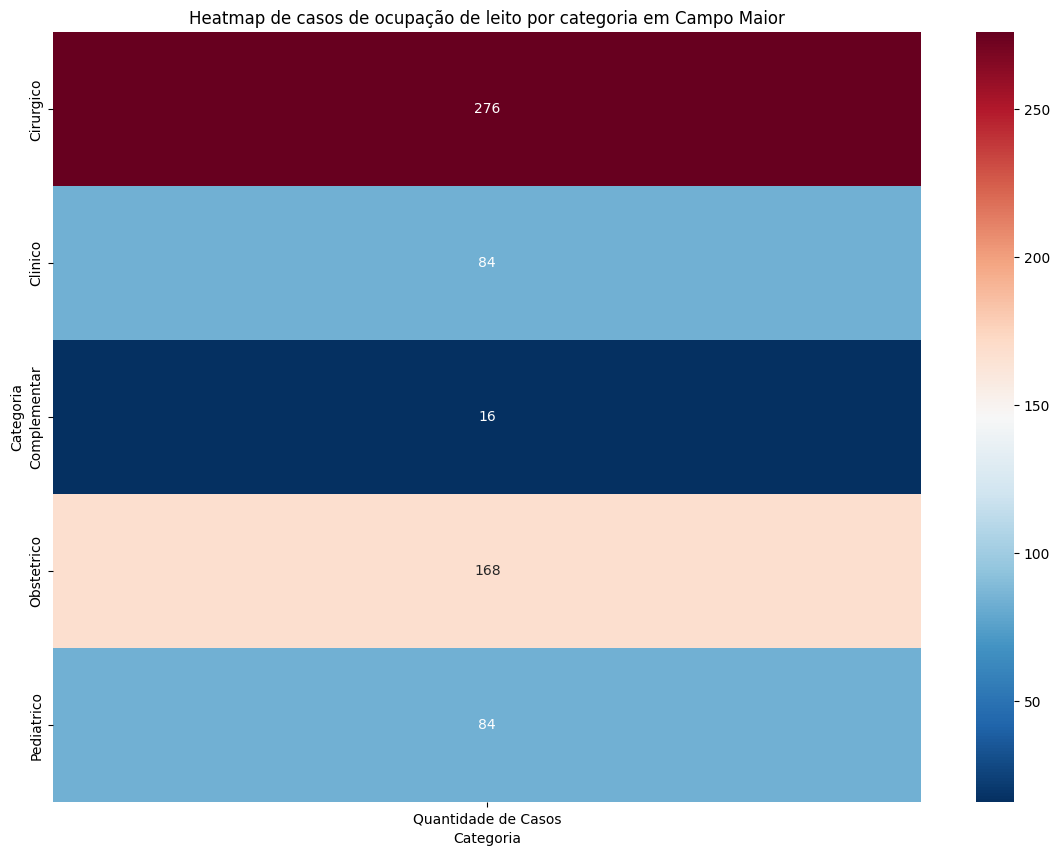

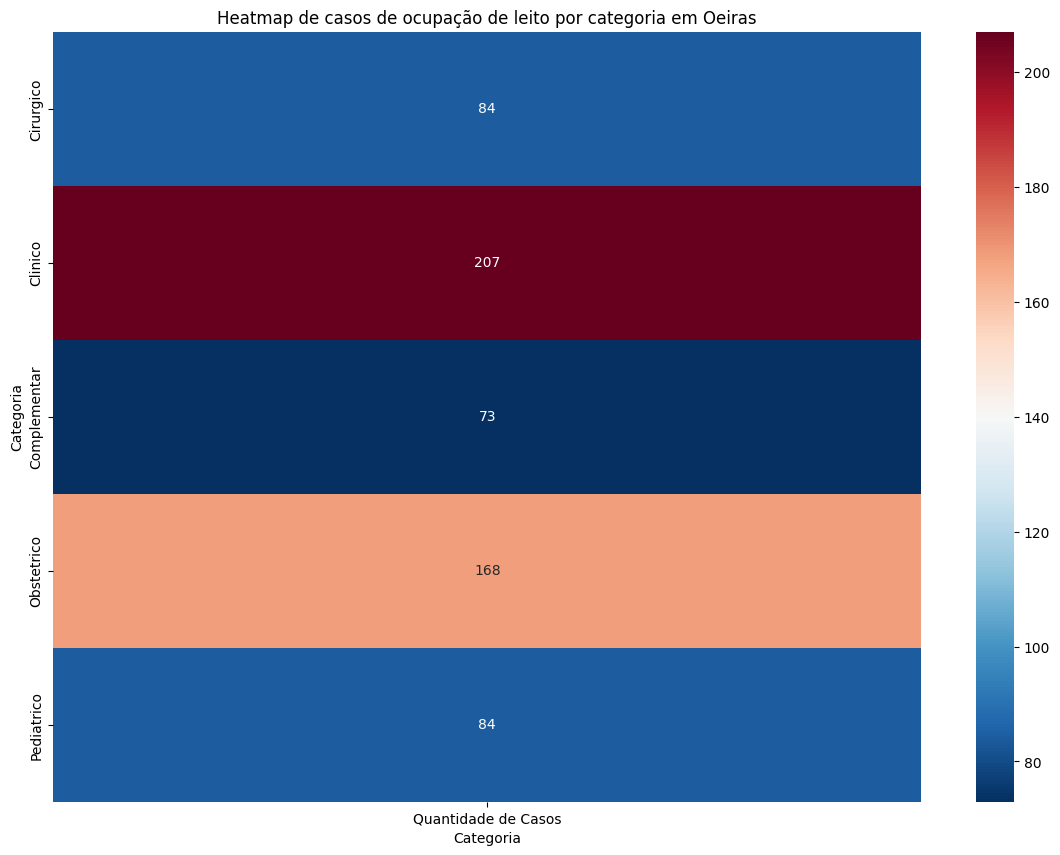

In [ ]:
top_n = 10
top_municipios = ds['Município'].value_counts().head(top_n).index

cores = sns.color_palette("RdBu_r", as_cmap=True)

for municipio in top_municipios:
    ds_municipio = ds[(ds["Município"] == municipio) & (ds['Categoria'].notnull())]

    if not ds_municipio.empty:
        casos_municipio_categoria = ds_municipio.groupby("Categoria").size().reset_index(name="Quantidade de Casos")

        if not casos_municipio_categoria.empty:
            plt.figure(figsize=(14, 10))
            sns.heatmap(casos_municipio_categoria.set_index('Categoria'), annot=True, cmap=cores, fmt="g")
            plt.title(f"Heatmap de casos de ocupação de leito por categoria em {municipio}")
            plt.xlabel("Categoria")
            plt.show()

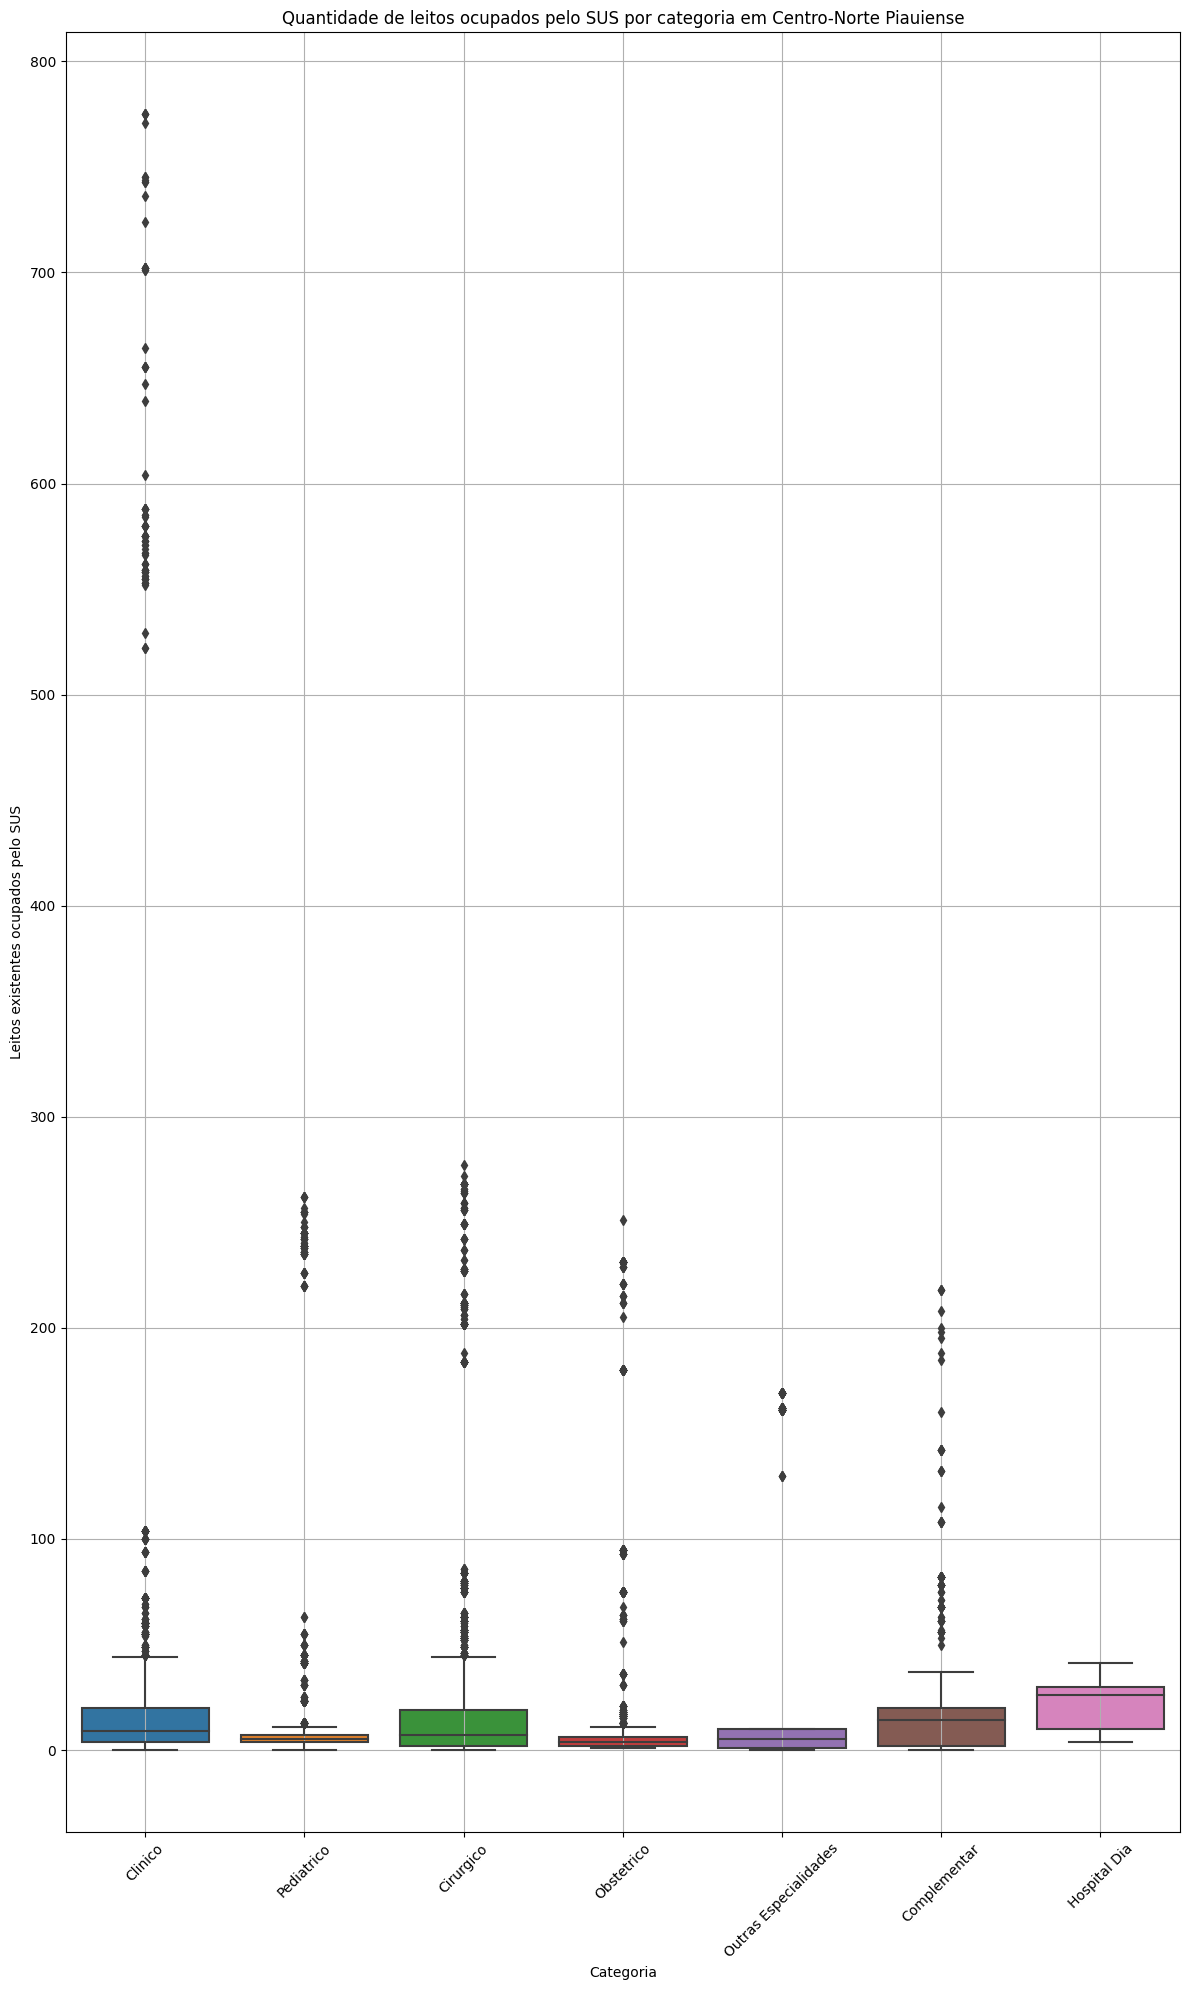

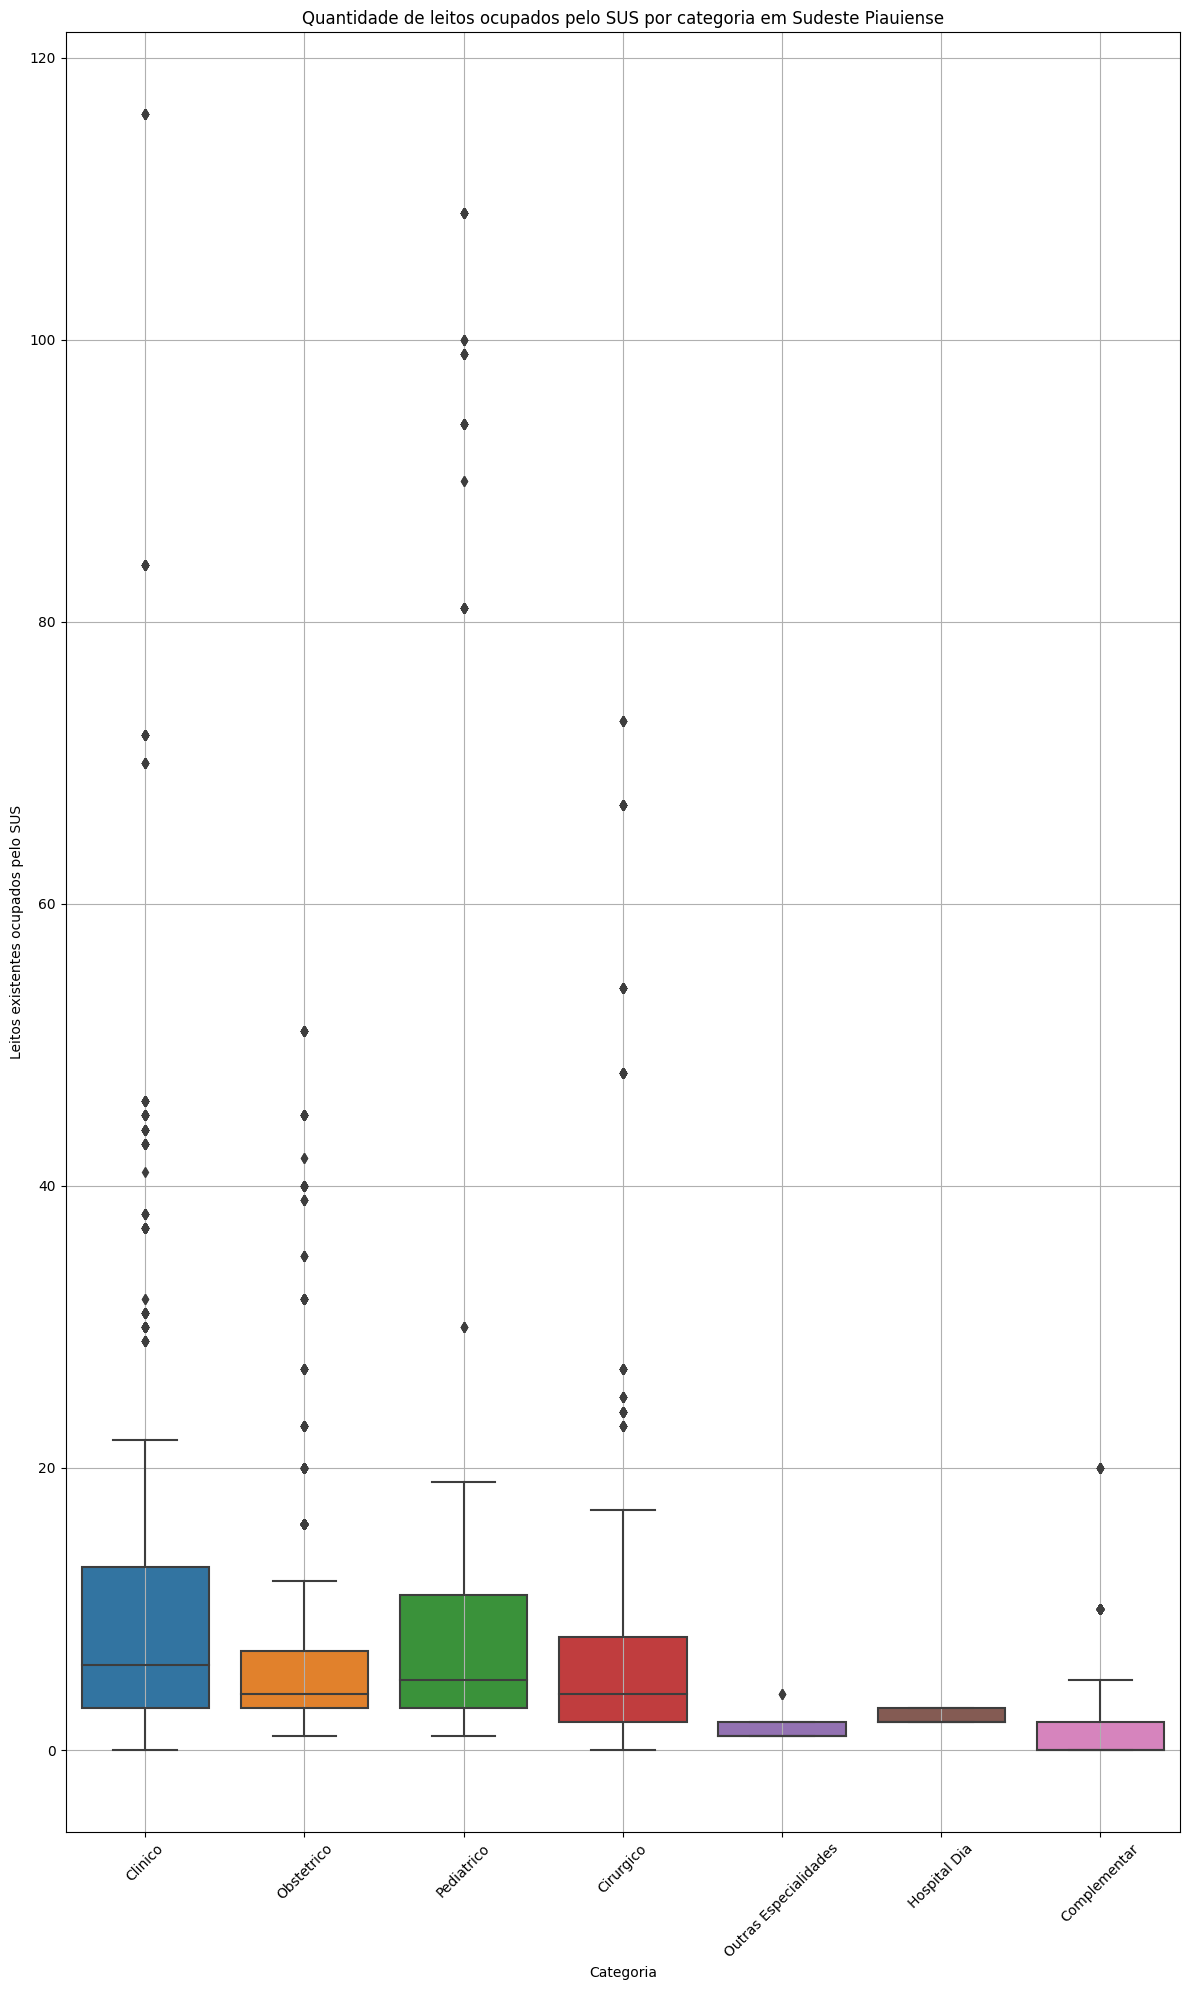

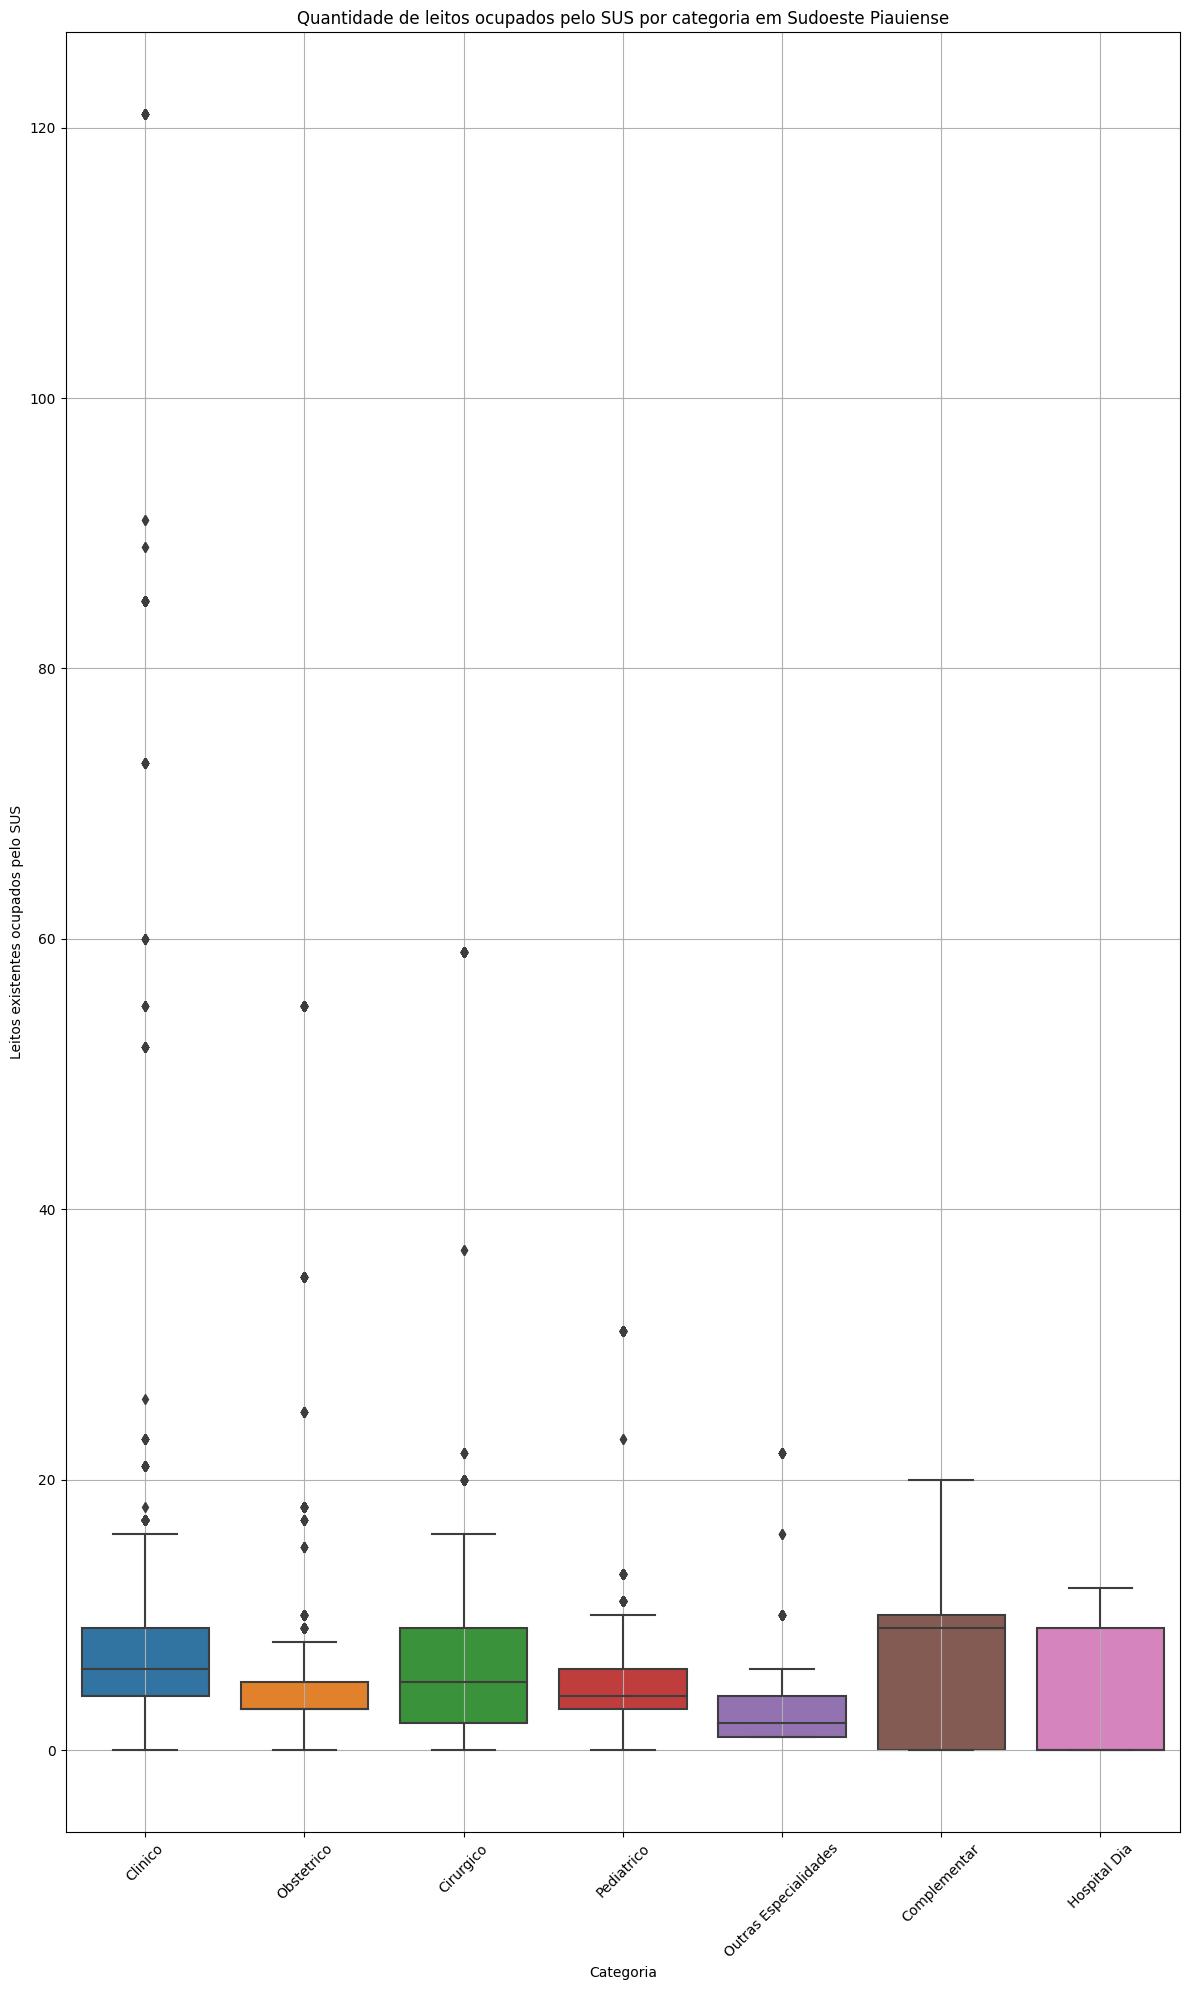

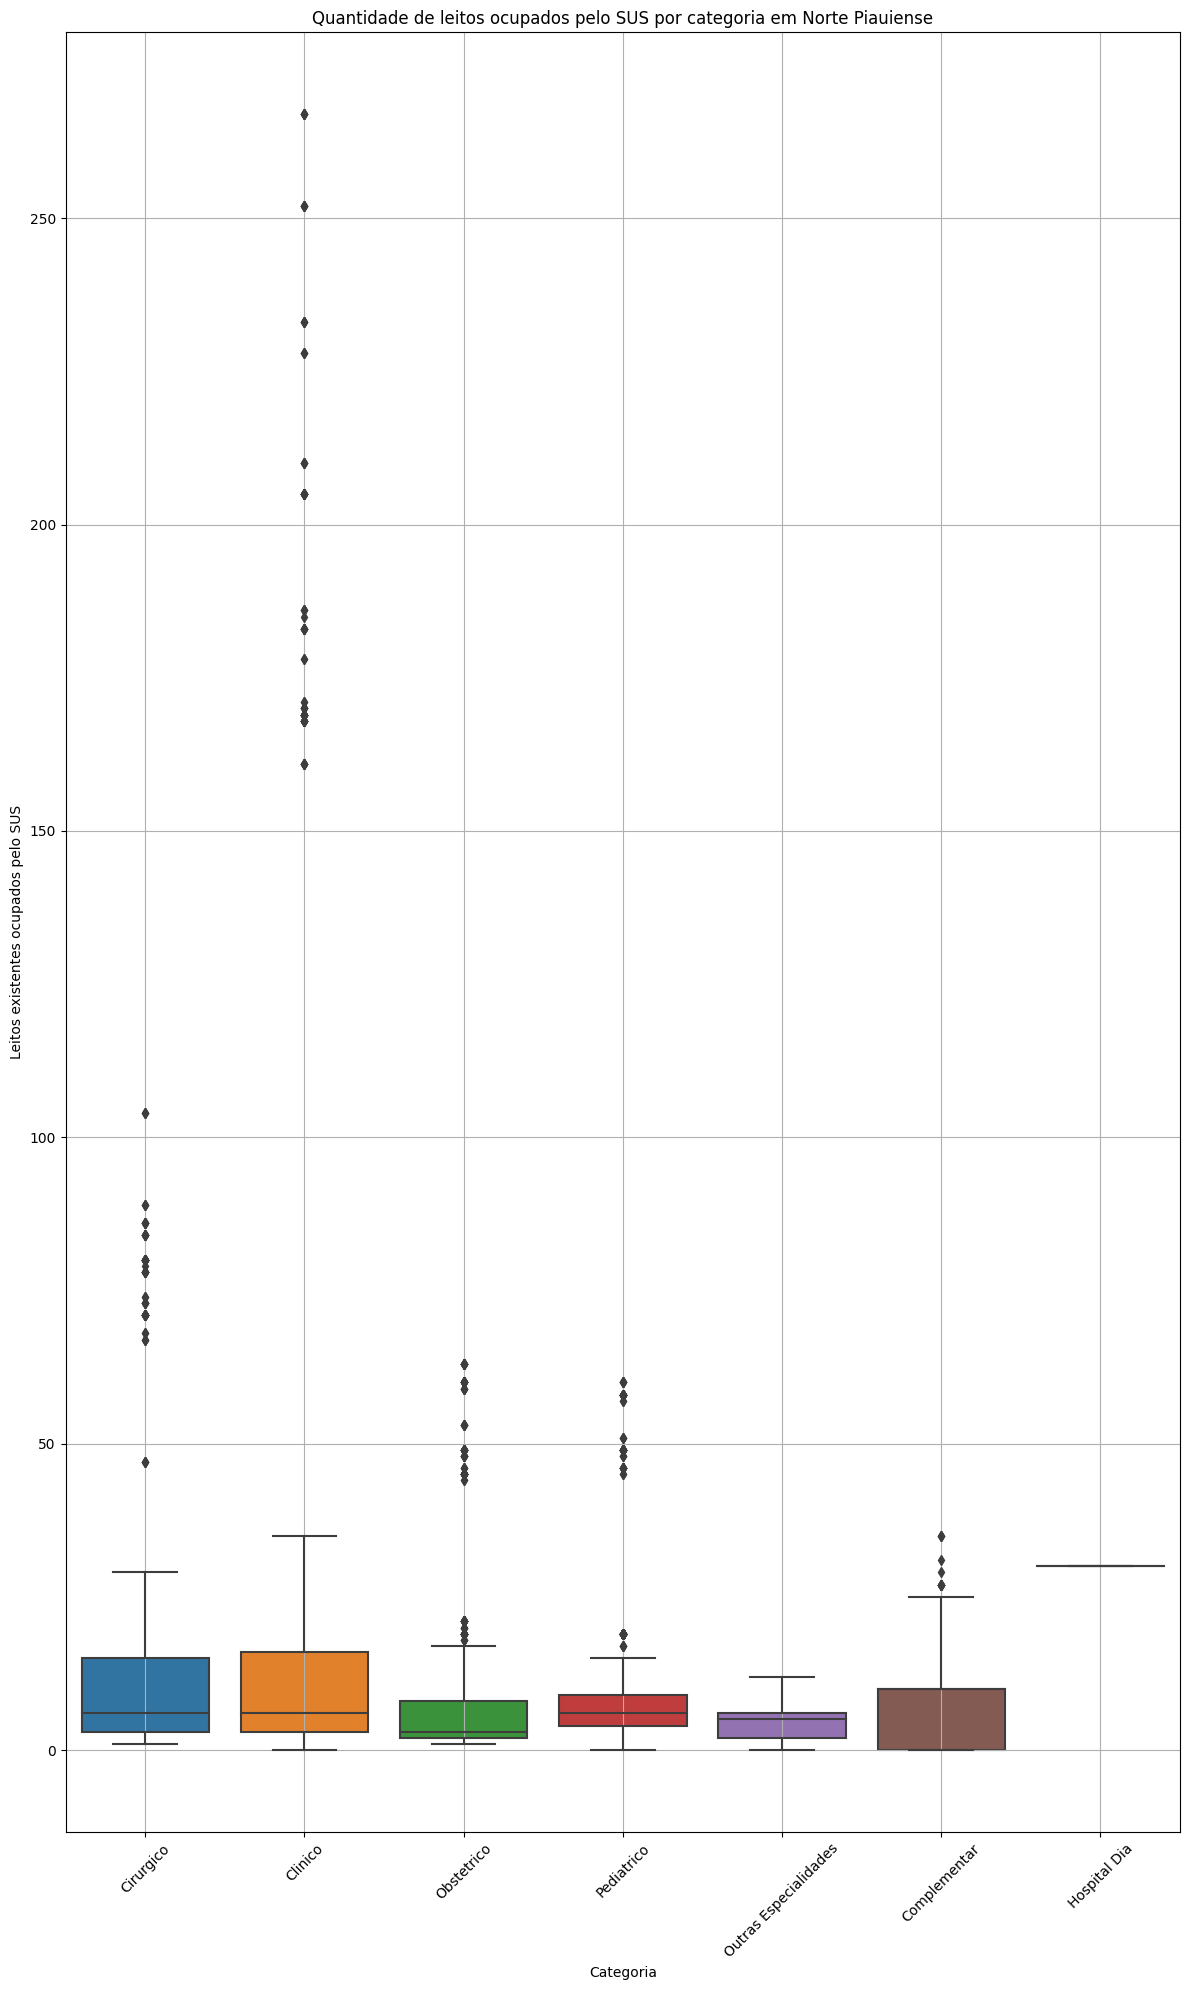

In [ ]:
mesorregioes = ds['Mesoregião'].unique()

for regiao in mesorregioes:
    dados_regiao = ds[ds['Mesoregião'] == regiao]

    plt.figure(figsize=(12, 20))
    plt.title(f'Quantidade de leitos ocupados pelo SUS por categoria em {regiao}')
    plt.xticks(rotation=45)

    sns.boxplot(data=dados_regiao, x='Categoria', y='SUS', linewidth=1.5)
    plt.grid(True)
    plt.xlabel('Categoria')
    plt.ylabel('Leitos existentes ocupados pelo SUS')
    plt.tight_layout()
    plt.show()

In [ ]:
colunas_para_normalizar = ds[['SUS', 'Existente']]

scaler = StandardScaler()

ajuste = scaler.fit(colunas_para_normalizar)

normal = scaler.transform(colunas_para_normalizar)

normalpadrao = pd.DataFrame(normal, columns=['SUS_Normalizado', 'Existente_Normalizado'])

print(normalpadrao.sort_values(ascending= False, by='Existente_Normalizado'))

       SUS_Normalizado  Existente_Normalizado
0            -0.121532              -0.155801
1            -0.149897              -0.179543
2            -0.121532              -0.155801
3            -0.149897              -0.179543
4            -0.121532              -0.155801
...                ...                    ...
48567        -0.263358              -0.274513
48568        -0.121532              -0.155801
48569        -0.234992              -0.250770
48570        -0.234992              -0.250770
48571        -0.263358              -0.274513

[48572 rows x 2 columns]


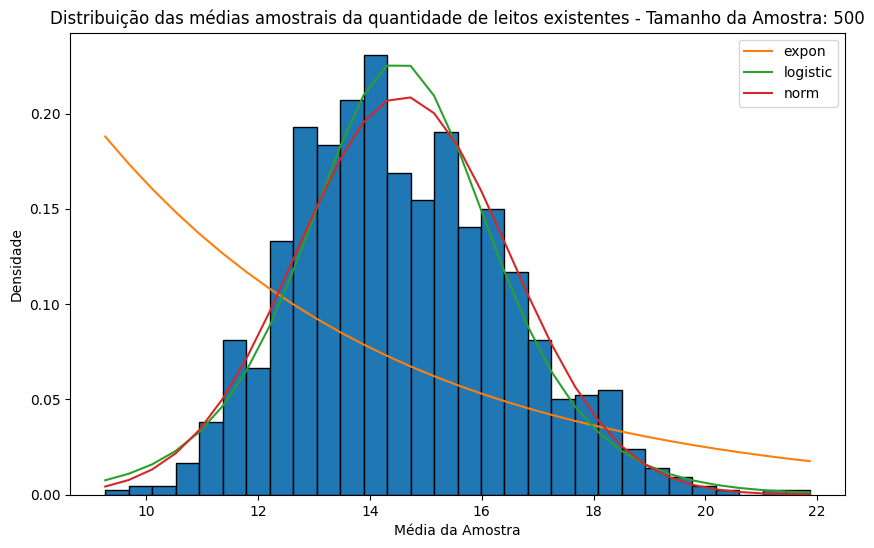

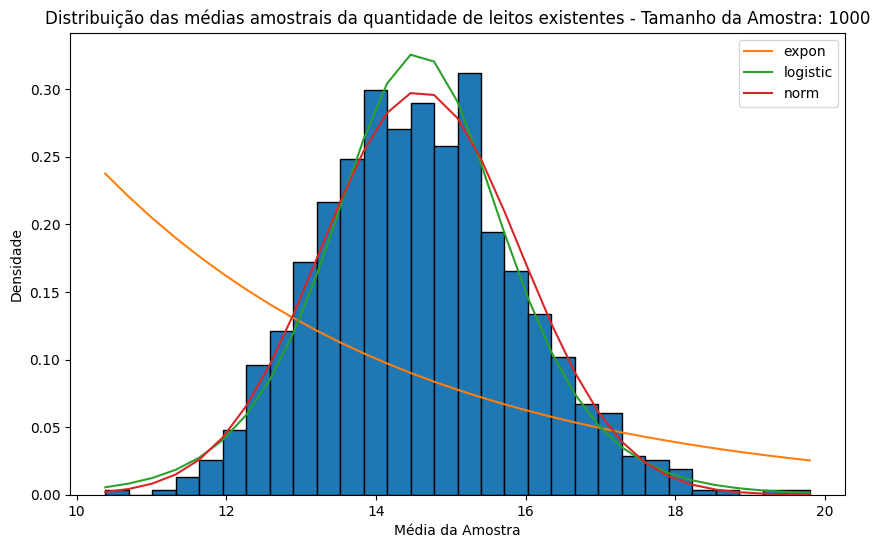

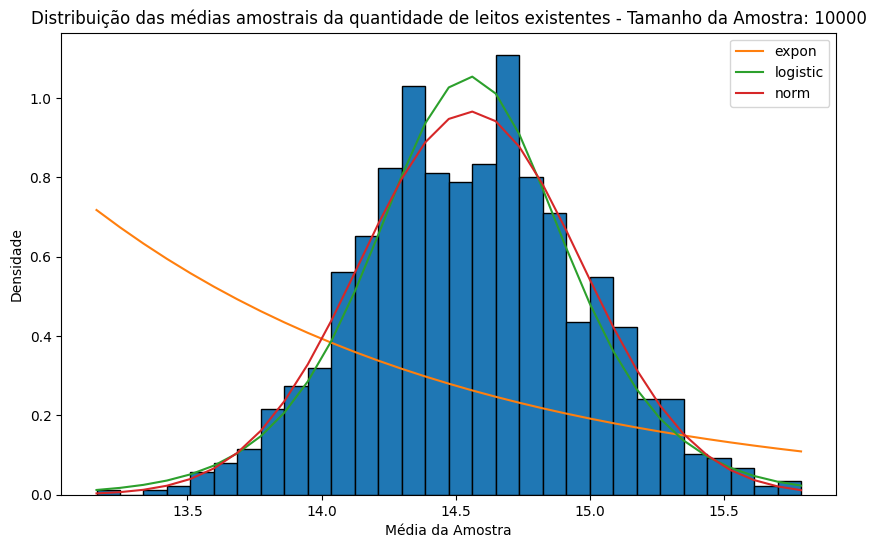

In [ ]:
variavel_analise = 'Existente'
tamanhos_amostra = [500, 1000, 4000]

for tamanho in tamanhos_amostra:
    medias_amostrais = []
    for _ in range(1000):
        amostra = np.random.choice(ds[variavel_analise], tamanho, replace=True)
        medias_amostrais.append(np.mean(amostra))

    plt.figure(figsize=(10, 6))
    h = plt.hist(medias_amostrais, bins=30, edgecolor='black', density=True)

    dists_names = ['expon', 'logistic', 'norm']
    for dist_name in dists_names:
        dist = getattr(scipy.stats, dist_name)
        params = dist.fit(medias_amostrais)
        arg = params[:-2]
        loc = params[-2]
        scale = params[-1]
        if arg:
            pdf_fitted = dist.pdf(h[1], *arg, loc=loc, scale=scale)
        else:
            pdf_fitted = dist.pdf(h[1], loc=loc, scale=scale)

        plt.plot(h[1], pdf_fitted, label=dist_name)

    plt.title(f'Distribuição das médias amostrais da quantidade de leitos existentes - Tamanho da Amostra: {tamanho}')
    plt.xlabel('Média da Amostra')
    plt.ylabel('Densidade')
    plt.legend()
    plt.show()

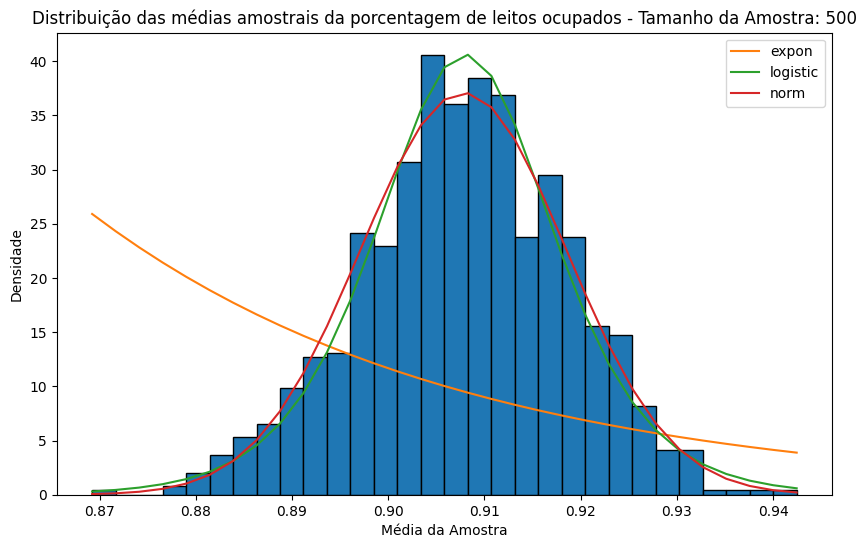

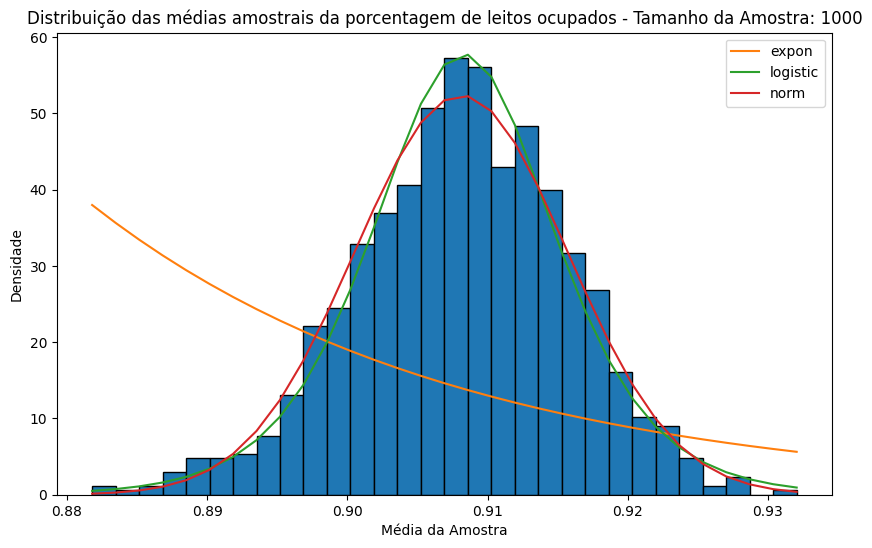

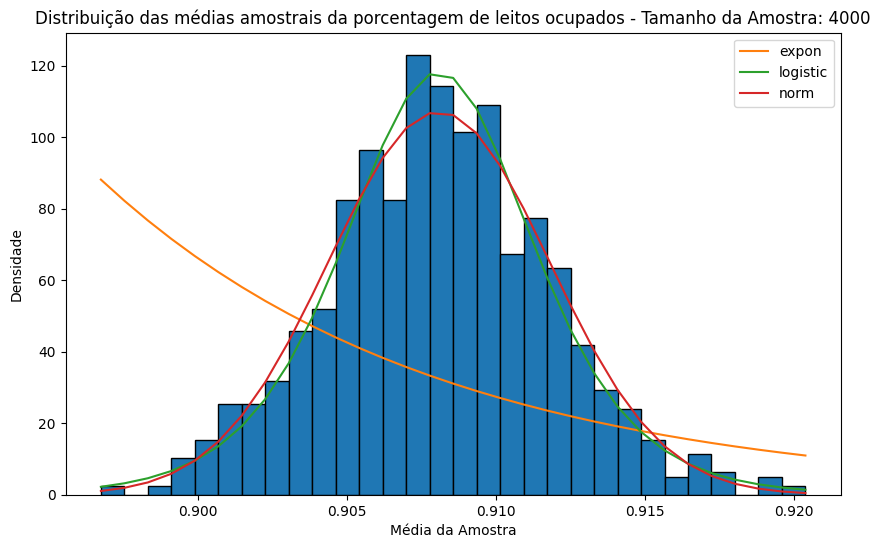

In [ ]:
variavel_analise = '%Ocupação'
tamanhos_amostra = [500, 1000, 4000]

for tamanho in tamanhos_amostra:
    medias_amostrais = []
    for _ in range(1000):
        amostra = np.random.choice(ds[variavel_analise], tamanho, replace=True)
        medias_amostrais.append(np.mean(amostra))

    plt.figure(figsize=(10, 6))
    h = plt.hist(medias_amostrais, bins=30, edgecolor='black', density=True)

    dists_names = ['expon', 'logistic', 'norm']
    for dist_name in dists_names:
        dist = getattr(scipy.stats, dist_name)
        params = dist.fit(medias_amostrais)
        arg = params[:-2]
        loc = params[-2]
        scale = params[-1]
        if arg:
            pdf_fitted = dist.pdf(h[1], *arg, loc=loc, scale=scale)
        else:
            pdf_fitted = dist.pdf(h[1], loc=loc, scale=scale)

        plt.plot(h[1], pdf_fitted, label=dist_name)

    plt.title(f'Distribuição das médias amostrais da porcentagem de leitos ocupados - Tamanho da Amostra: {tamanho}')
    plt.xlabel('Média da Amostra')
    plt.ylabel('Densidade')
    plt.legend()
    plt.show()

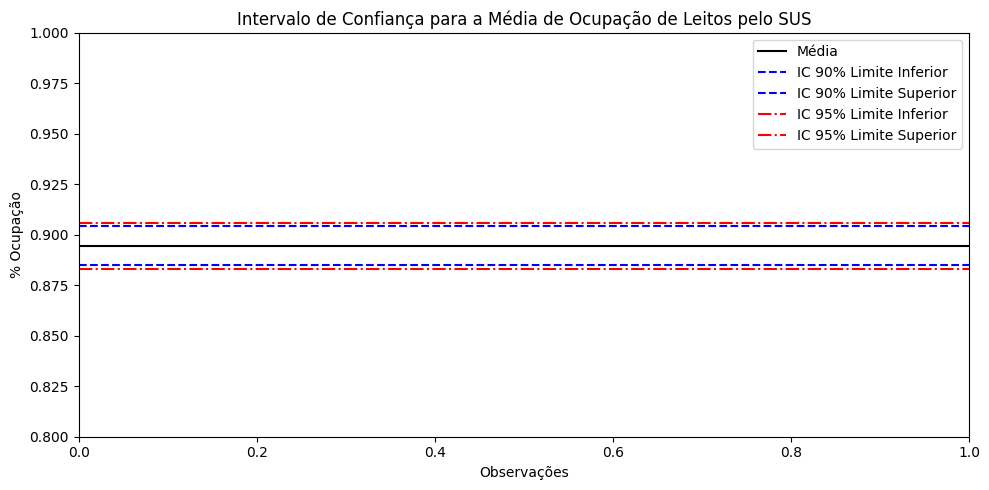

In [18]:
from scipy import stats

np.random.seed(0)
sus = np.random.uniform(low=0.8, high=1.0, size=100)

media_sus = np.mean(sus)
desvio_padrao_sus = np.std(sus, ddof=1)
tamanho_amostra_sus = len(sus)

nivel_confianca_90 = 0.90
nivel_confianca_95 = 0.95

ic_90_sus = stats.t.interval(nivel_confianca_90, df=tamanho_amostra_sus - 1, loc=media_sus, scale=desvio_padrao_sus / np.sqrt(tamanho_amostra_sus))
ic_95_sus = stats.t.interval(nivel_confianca_95, df=tamanho_amostra_sus - 1, loc=media_sus, scale=desvio_padrao_sus / np.sqrt(tamanho_amostra_sus))

plt.figure(figsize=(10, 5))

plt.axhline(y=media_sus, color='black', linestyle='-', label='Média')

plt.axhline(y=ic_90_sus[0], color='blue', linestyle='--', label='IC 90% Limite Inferior')
plt.axhline(y=ic_90_sus[1], color='blue', linestyle='--', label='IC 90% Limite Superior')

plt.axhline(y=ic_95_sus[0], color='red', linestyle='-.', label='IC 95% Limite Inferior')
plt.axhline(y=ic_95_sus[1], color='red', linestyle='-.', label='IC 95% Limite Superior')

plt.ylim(0.8, 1.0)

plt.title('Intervalo de Confiança para a Média de Ocupação de Leitos pelo SUS')
plt.xlabel('Observações')
plt.ylabel('% Ocupação')
plt.legend()
plt.tight_layout()
plt.show()